In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import datetime
import random

# About the Dataset:

<b>Information about the data: </b>

<b> About this dataset: </b> <br><br>
- Data in these reference tables have been calculated using Textkernel online job adverts data. They show volumes of online job adverts by different geographies and different occupations detail (see below for definitions).

- These statistics should be treated as official statistics in development (previously known as experimental statistics), as they are still subject to testing the ability to meet user needs and may be modified in the future. More information on official statistics in development can be found here: https://www.ons.gov.uk/methodology/methodologytopicsandstatisticalconcepts/guidetoofficialstatisticsindevelopment

- The data tables in this spreadsheet were published on the 15th March 2024.

<br><b>
Information to consider: </b>
<b> New Adverts: </b> <br><br>
New adverts represent the total number of adverts that have gone online in the month. This metric is calculated by counting the number of adverts that appear for the first time across the calendar month. 

<b> Textkernel Data: </b> <br><br>
Textkernel data is collected using comprehensive web-scraping software which downloads job advert information from approximately 90,000 job boards and recruitment pages. The scraped data includes job titles, descriptions, posting dates and expiration dates. Additionally, Textkernel provide variables which are derived from the scraped data using data science and natural language processing methods. These describe location, salary, seniority, skill requirements, home/office working, and more. Textkernel perform some proprietary data cleaning to identify duplicate job adverts, which ONS have removed in this release. Duplication can occur when the same job is posted on multiple job boards, or when multiple recruiters advertise the job at the same time.

<b> SOC 2020: </b> <br><br>
To evaluate performance of the SOC allocation algorithm, we assessed its accuracy on a manually labelled set of adverts. We found that algorithm accuracy progressively decreased at the more granular levels of the SOC hierarchy, meaning that accuracy was the highest at the level of SOC major groups (1-digit SOC). Hence, the tables shown in this output are less granular for smaller geographies (2-digit) and the lowest level  (4-digit) is only shown for country-level results.

<b> Units, rounding and suppression: </b> <br><br>
Counts have been rounded to the nearest 5. Due to this rounding, aggregations across different tables may not sum to the same value. Note, this is particularly relevant where there are many granular categories of job adverts at one level of geography and occupation detail that would have been rounded to 0, as when aggregated, the sum of these supressed values will be significant. Counts that round to 0 have been replaced with [x].

<b> Quality of Data: </b> <br><br>
Due to the experimental nature of online job advert data, there are some quality aspects to be aware of when using the data. In some cases, there is no clear method to rectify these issues, so they are reported here as a caveat.

Missing information:
ONS has received incorrect delivery of expiration dates during some periods of the timeseries. Textkernel informed us that there was an issue with the data scraping algorithms in 2021. The data scraping software, at that time, reported the expiration of many adverts that were, in fact, still live. Because of this, the data would have showed a large drop-off in volumes, followed by a large spike in the last quarter of 2021, as adverts came back online. ONS has rectified this by imputing new expiration dates throughout the erroneous period, which has had the desired effect of smoothing the timeseries. Expiration dates were imputed for the periods: 1st April 2020 - 7th December 2021. This imputation mostly affects the snapshot metric.Textkernel has updated their methodologies and taxonomies throughout the timeseries back to 2017. This results in changes to classification of locations, which can produce some step-changes in the data.

Geographic allocation:
A substantial proportion of online job adverts have a limited level of granularity regarding location. Textkernel’s default method when assigning adverts to local authority with limited location information was to assign to the centroid of the region. This was most prevalent in London, where Westminster reported much higher counts than the surrounding local authorities as it is the centroid of the region of London. For this release, we have grouped all local authorities of London into the same region. Note, there are also online job adverts that have not been assigned to a local authority district which are shown as 'Unknown', and so when they are mapped to country, region, mayoral combined authority, local skills improvement plan, and local enterprise partnership, those regions only contain adverts that were in a known local authority.

Duplicate adverts:
To remove duplicate advertisements for the same job from the dataset, Textkernel groups 'postings' into 'jobs'. A job advert can be live in the form of many postings, across different websites. ONS uses Textkernel's deduplication method and reports deduplicated counts. However, sometimes 'postings' are grouped together into the same 'job' while their advertising periods do not overlap. This means there is some period of time when the job is not actually being advertised on any website, before it again becomes live on another website. Considering that ONS' focus is on 'live' adverts, we have decided to consider all such separate instances of adverts as two distinct entries, if the period when the 'job' is not on any website is more than two days. This means there will be a new advert counted when its posting becomes live, following a previous posting for the same job that has expired more than two days previously. Similarly, the advert is only counted in the snapshot measure if it is during a period when it is on at least one website.

# SOC4 - Country : TABLE 19

## Loading Dataset and Inspecting Quality

In [2]:
df_t19= pd.read_excel('Data/labourdemandbyoccupation.xlsx', sheet_name='Table 19', skiprows=4)
df_t19.head(2)

Country  SOC 4 digit code                      SOC 4 digit label Jan-17  \
0  Total UK              1111  Chief executives and senior officials    920   
1  Total UK              1112   Elected officers and representatives    625   

  Feb-17 Mar-17 Apr-17 May-17 Jun-17 Jul-17  ... Aug-22 Sep-22 Oct-22 Nov-22  \
0    790    900   1290    680    710    610  ...    820    850    900    870   
1    545    675    615    650    660    575  ...   1125    895    985    905   

  Dec-22 Jan-23 Feb-23 Mar-23 Apr-23 May-23  
0    820    835    790    820    645    855  
1    640    785    675    695    640    735  

[2 rows x 80 columns]

In [3]:
# Deleting aggregating rows - Total UK
df_t19 = df_t19[df_t19['Country'] != 'Total UK']
df_t19.head(2)

Country  SOC 4 digit code                      SOC 4 digit label Jan-17  \
412  England              1111  Chief executives and senior officials    730   
413  England              1112   Elected officers and representatives    530   

    Feb-17 Mar-17 Apr-17 May-17 Jun-17 Jul-17  ... Aug-22 Sep-22 Oct-22  \
412    590    705    710    530    535    480  ...    745    755    760   
413    440    580    500    525    550    470  ...    960    810    895   

    Nov-22 Dec-22 Jan-23 Feb-23 Mar-23 Apr-23 May-23  
412    795    735    760    690    735    570    765  
413    815    590    705    615    625    585    665  

[2 rows x 80 columns]

In [4]:
df_t19.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1648 entries, 412 to 2059
Data columns (total 80 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Country            1648 non-null   object
 1   SOC 4 digit code   1648 non-null   int64 
 2   SOC 4 digit label  1648 non-null   object
 3   Jan-17             1601 non-null   object
 4   Feb-17             1586 non-null   object
 5   Mar-17             1607 non-null   object
 6   Apr-17             1606 non-null   object
 7   May-17             1615 non-null   object
 8   Jun-17             1607 non-null   object
 9   Jul-17             1604 non-null   object
 10  Aug-17             1601 non-null   object
 11  Sep-17             1609 non-null   object
 12  Oct-17             1606 non-null   object
 13  Nov-17             1607 non-null   object
 14  Dec-17             1573 non-null   object
 15  Jan-18             1611 non-null   object
 16  Feb-18             1595 non-null   objec

In [5]:
# Inspecting Quality of Categorical Variables:
t19_cat = []

for col in df_t19.iloc[:,:3].columns:
    print(col)
    print(df_t19[col].unique())
    print(df_t19[col].nunique())
    t19_cat.append(df_t19[col].nunique())
    print('-----------------------------------------------------------------------------')
    print('-----------------------------------------------------------------------------')


Country
['England' 'Scotland' 'Wales' 'Northern Ireland']
4
-----------------------------------------------------------------------------
-----------------------------------------------------------------------------
SOC 4 digit code
[1111 1112 1121 1122 1123 1131 1132 1133 1134 1135 1136 1137 1139 1140
 1150 1161 1162 1163 1171 1172 1211 1212 1221 1222 1223 1224 1225 1231
 1232 1233 1241 1242 1243 1251 1252 1253 1254 1255 1256 1257 1258 1259
 2111 2112 2113 2114 2115 2119 2121 2122 2123 2124 2125 2126 2127 2129
 2131 2132 2133 2134 2135 2136 2137 2139 2141 2142 2151 2152 2161 2162
 2211 2212 2221 2222 2223 2224 2225 2226 2229 2231 2232 2233 2234 2235
 2236 2237 2240 2251 2252 2253 2254 2255 2256 2259 2311 2312 2313 2314
 2315 2316 2317 2319 2321 2322 2323 2324 2329 2411 2412 2419 2421 2422
 2423 2431 2432 2433 2434 2435 2439 2440 2451 2452 2453 2454 2455 2461
 2462 2463 2464 2469 2471 2472 2481 2482 2483 2491 2492 2493 2494 3111
 3112 3113 3114 3115 3116 3119 3120 3131 3132 3133 3211 3

In [6]:
## Asserting Countries and SOC4 - Occupations
assert t19_cat[0] == 4 # 4 Countries
assert t19_cat[1] == t19_cat[2] # SOC 4 = Occupations

In [7]:
# Checking nulls and [x] values:
df_t19.isnull().sum()

Country               0
SOC 4 digit code      0
SOC 4 digit label     0
Jan-17               47
Feb-17               62
                     ..
Jan-23               21
Feb-23               23
Mar-23               27
Apr-23               36
May-23               25
Length: 80, dtype: int64

<b> Nulls and [x] can be changed to 0 --> Information in 1. About the Dataset

In [8]:
# Inspecting Jan-17
df_t19['Jan-17'].value_counts()

5       175
10      126
15      108
[x]      86
20       67
       ... 
1055      1
4190      1
5395      1
530       1
45        1
Name: Jan-17, Length: 331, dtype: int64

 <b> There exists some nulls and some ['x']

In [9]:
# Replacing with 0 
df_t19.replace('[x]', 0, inplace=True)
df_t19.replace(np.NaN, 0, inplace=True)

In [10]:
# Asserting it works:
assert df_t19.isnull().sum().sum() == 0 # No nulls
assert ('x' in df_t19['Jan-17'].values) == False  # No [x] values

In [11]:
# Changing Monthly Columns to int64 (From Strings)
df_t19.iloc[:, 3:] = df_t19.iloc[:, 3:].astype('int64', errors='raise')
df_t19.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1648 entries, 412 to 2059
Data columns (total 80 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Country            1648 non-null   object
 1   SOC 4 digit code   1648 non-null   int64 
 2   SOC 4 digit label  1648 non-null   object
 3   Jan-17             1648 non-null   int64 
 4   Feb-17             1648 non-null   int64 
 5   Mar-17             1648 non-null   int64 
 6   Apr-17             1648 non-null   int64 
 7   May-17             1648 non-null   int64 
 8   Jun-17             1648 non-null   int64 
 9   Jul-17             1648 non-null   int64 
 10  Aug-17             1648 non-null   int64 
 11  Sep-17             1648 non-null   int64 
 12  Oct-17             1648 non-null   int64 
 13  Nov-17             1648 non-null   int64 
 14  Dec-17             1648 non-null   int64 
 15  Jan-18             1648 non-null   int64 
 16  Feb-18             1648 non-null   int64

## Reshaping as Time Series format:

Monthly columns as rows. Date Format on month!

In [12]:
df_t19_ts = pd.melt(df_t19, id_vars=['Country', 'SOC 4 digit code', 'SOC 4 digit label'], var_name='Date', value_name='Data')
df_t19_ts['Date'] = pd.to_datetime(df_t19_ts['Date'], format='%b-%y', errors='raise')
df_t19_ts['Month'] = df_t19_ts['Date'].dt.to_period('M')
df_t19_ts.head(3)

Country  SOC 4 digit code  \
0  England              1111   
1  England              1112   
2  England              1121   

                                   SOC 4 digit label       Date  Data    Month  
0              Chief executives and senior officials 2017-01-01   730  2017-01  
1               Elected officers and representatives 2017-01-01   530  2017-01  
2  Production managers and directors in manufactu... 2017-01-01  5435  2017-01

In [13]:
df_t19_ts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 126896 entries, 0 to 126895
Data columns (total 6 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   Country            126896 non-null  object        
 1   SOC 4 digit code   126896 non-null  int64         
 2   SOC 4 digit label  126896 non-null  object        
 3   Date               126896 non-null  datetime64[ns]
 4   Data               126896 non-null  int64         
 5   Month              126896 non-null  period[M]     
dtypes: datetime64[ns](1), int64(2), object(2), period[M](1)
memory usage: 5.8+ MB


# Exploratory first model: Grouping by Country (All SOC4 )

In [14]:
groupcountry_df_t19_ts = df_t19_ts.groupby(['Date', 'Country']).sum().reset_index().drop(columns='SOC 4 digit code')
groupcountry_df_t19_ts.head(4)

Date           Country    Data
0 2017-01-01           England  879810
1 2017-01-01  Northern Ireland   12050
2 2017-01-01          Scotland   41325
3 2017-01-01             Wales   21150

In [15]:
fig = px.line(groupcountry_df_t19_ts, x='Date', y='Data', color='Country', title='Labour Demand (New ADS) by Country')
fig.update_layout(height=800, width=1600)
fig.show()

## Time Series Decomposition - Understanding the Series

Time Series decomposition to understand the Time Series: Which laggings are important? Is it Stationary? 

In [16]:
groupcountry_df_t19_ts_c = groupcountry_df_t19_ts.copy()

Country: England
----------------------------------------------------------
Additive Decomposition


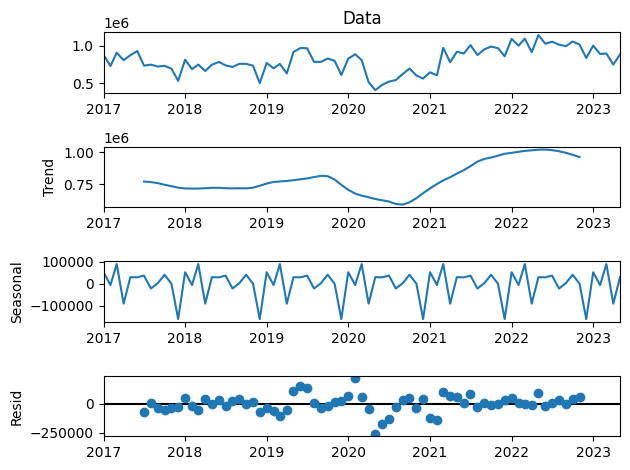

Multiplicative Decomposition


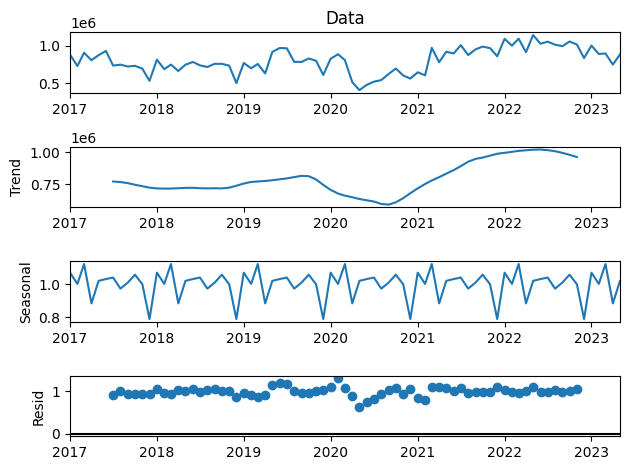

/home/tgarciar/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning:

The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.



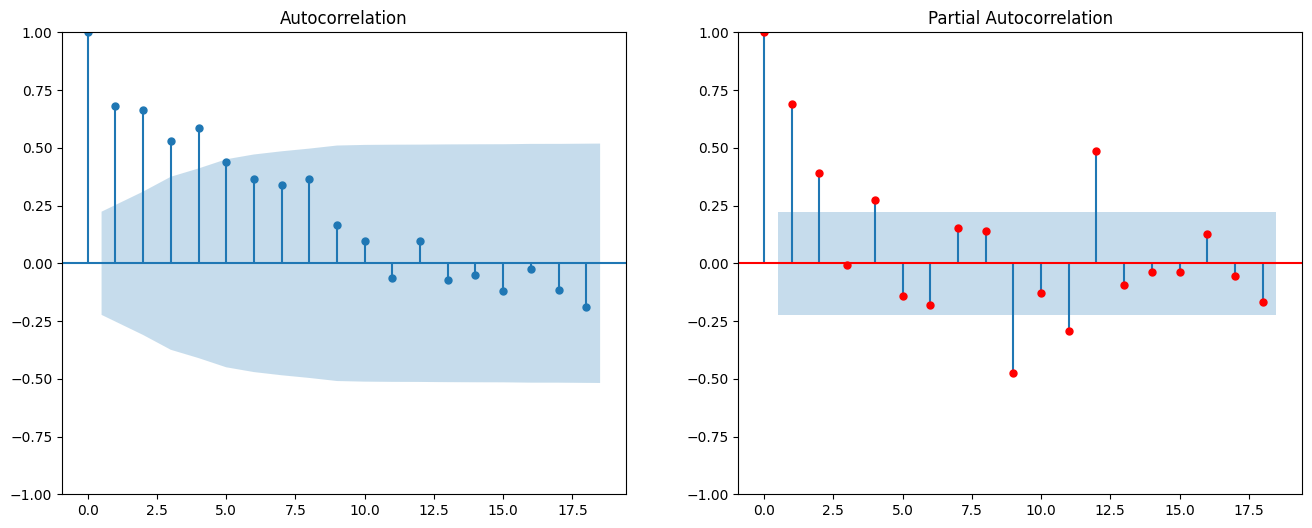

Country: Northern Ireland
----------------------------------------------------------
Additive Decomposition


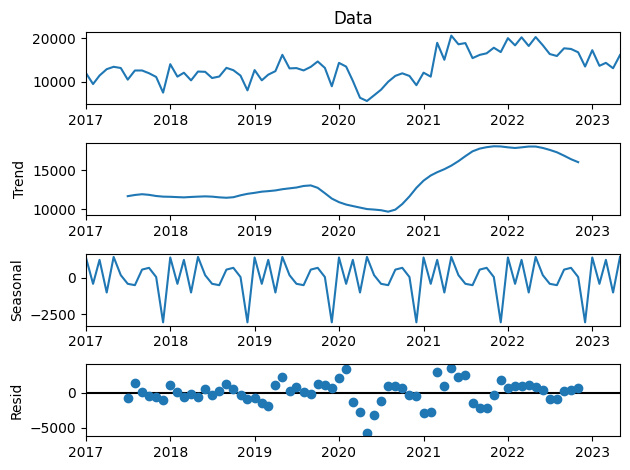

Multiplicative Decomposition


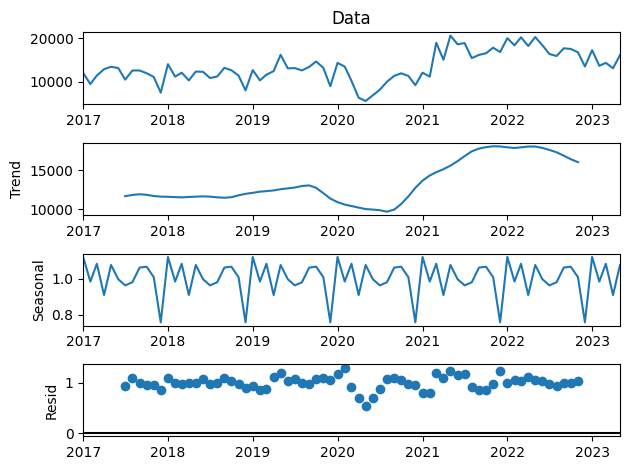

/home/tgarciar/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning:

The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.



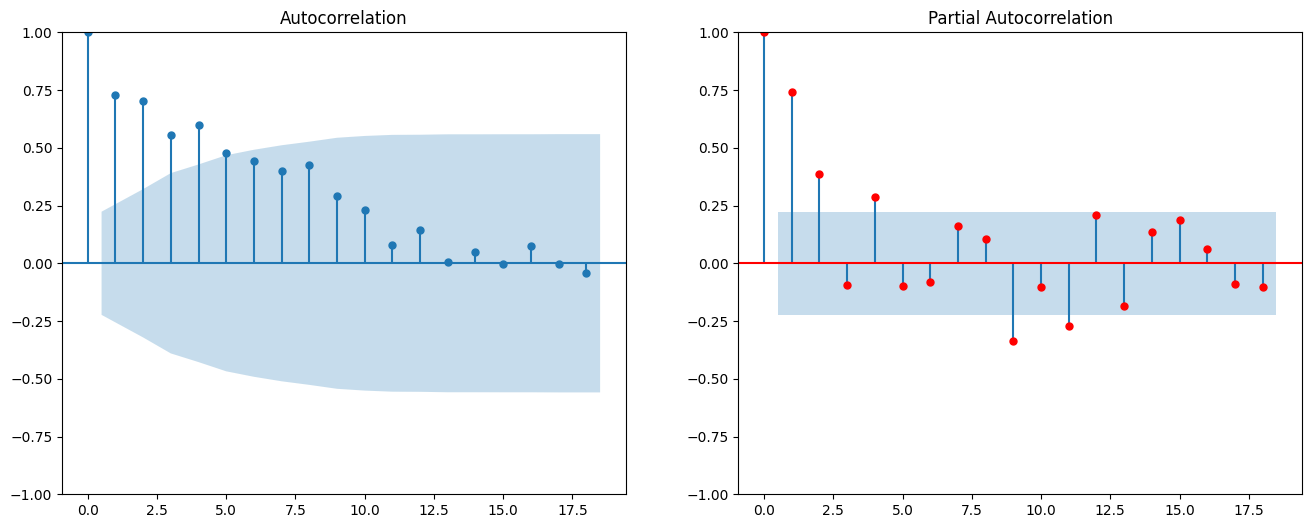

Country: Scotland
----------------------------------------------------------
Additive Decomposition


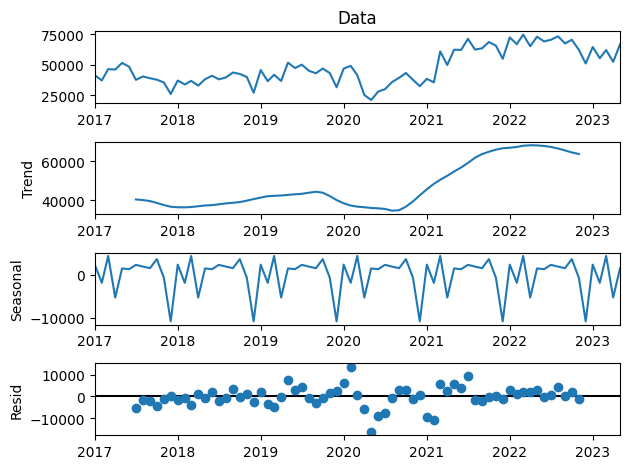

Multiplicative Decomposition


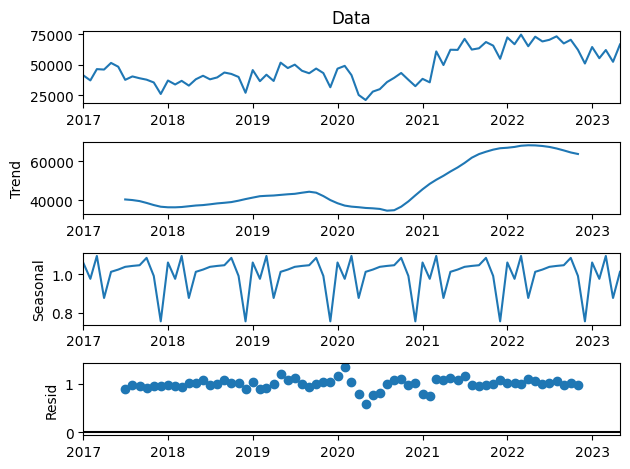

/home/tgarciar/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning:

The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.



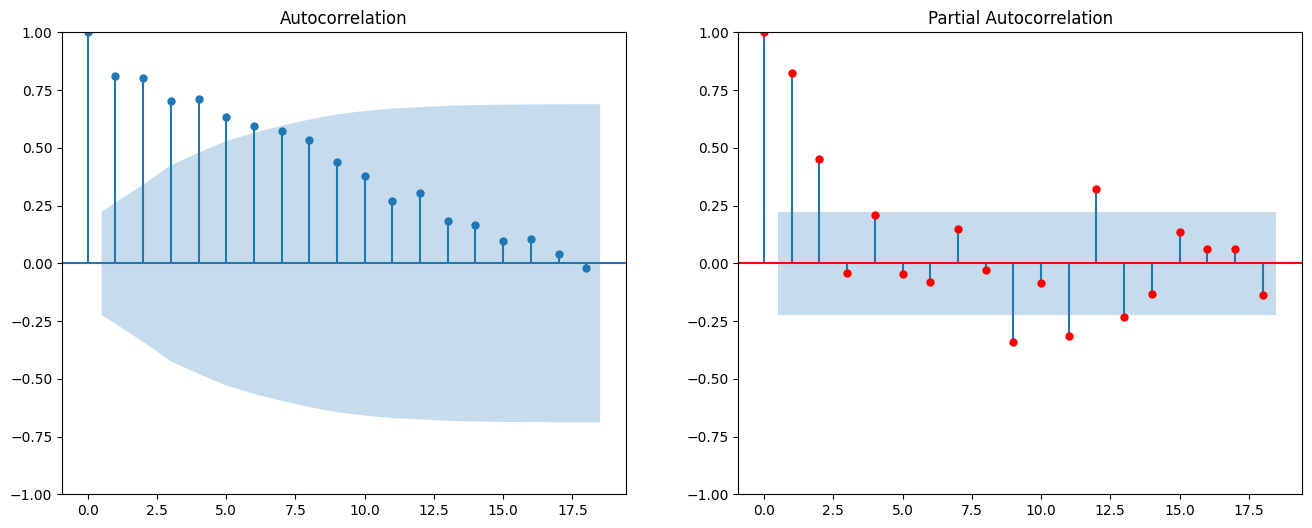

Country: Wales
----------------------------------------------------------
Additive Decomposition


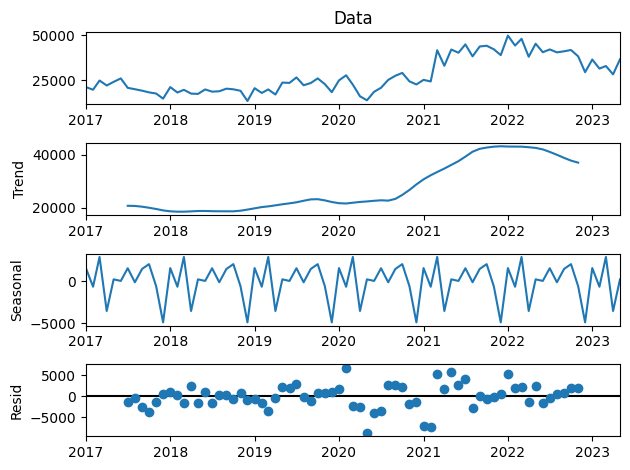

Multiplicative Decomposition


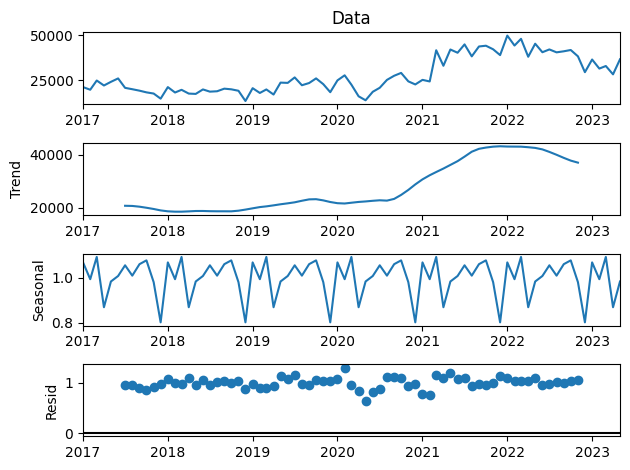

/home/tgarciar/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning:

The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.



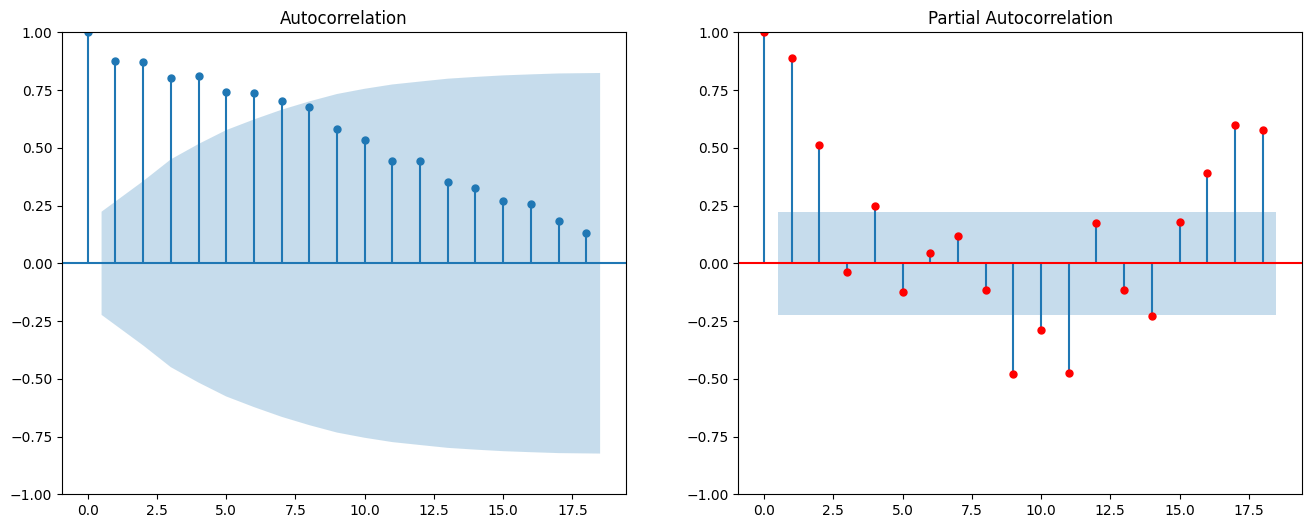

In [17]:
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_pacf, plot_acf


for country in groupcountry_df_t19_ts_c['Country'].unique():
    temporary_ts = groupcountry_df_t19_ts_c.copy()
    temporary_ts = temporary_ts[temporary_ts["Country"]== country]
    temporary_ts.set_index('Date', inplace=True)
    temporary_ts.drop(columns='Country', inplace=True)

    print(f'Country: {country}')
    print("----------------------------------------------------------")

    # Additive Decomposition (y = Trend + Seasonal + Residuals)


    ax1 = seasonal_decompose(temporary_ts['Data'], model='additive').plot()
    print("Additive Decomposition")
    plt.show()
    ax2 = seasonal_decompose(temporary_ts['Data'], model='multiplicative').plot()
    print("Multiplicative Decomposition")
    plt.show()




    fig, axes = plt.subplots(1,2, figsize=(16,6))

    plot_acf(temporary_ts['Data'], lags=18, ax=axes[0]);
    plot_pacf(temporary_ts['Data'], lags=18, ax=axes[1], color='r')
    plt.show()


## XGBooster by Country (EXPERIMENTAL: FIRST MODEL RUNNED)

### Preparing the dataset for XGBooster:

In [18]:
# Creatung OHE on countries:
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(sparse_output = False)

ohe.fit(groupcountry_df_t19_ts[['Country']])


groupcountry_df_t19_ts[ohe.get_feature_names_out()] = ohe.transform(groupcountry_df_t19_ts[["Country"]])


In [19]:
# Creating COVID feature: 02/2020 to 12/2020

groupcountry_df_t19_ts['covid'] = groupcountry_df_t19_ts['Date'].apply(lambda x: 1 if x.month >= 2 and x.year == 2020 and x.month <= 12 else 0)
groupcountry_df_t19_ts.head(2)

Date           Country    Data  Country_England  \
0 2017-01-01           England  879810              1.0   
1 2017-01-01  Northern Ireland   12050              0.0   

   Country_Northern Ireland  Country_Scotland  Country_Wales  covid  
0                       0.0               0.0            0.0      0  
1                       1.0               0.0            0.0      0

In [20]:
# Making Date the Index:
groupcountry_df_t19_ts.set_index('Date', inplace=True)
groupcountry_df_t19_ts.head(50)

Country    Data  Country_England  \
Date                                                    
2017-01-01           England  879810              1.0   
2017-01-01  Northern Ireland   12050              0.0   
2017-01-01          Scotland   41325              0.0   
2017-01-01             Wales   21150              0.0   
2017-02-01           England  729060              1.0   
2017-02-01  Northern Ireland    9525              0.0   
2017-02-01          Scotland   37090              0.0   
2017-02-01             Wales   19670              0.0   
2017-03-01           England  906065              1.0   
2017-03-01  Northern Ireland   11465              0.0   
2017-03-01          Scotland   46315              0.0   
2017-03-01             Wales   24820              0.0   
2017-04-01           England  806265              1.0   
2017-04-01  Northern Ireland   12915              0.0   
2017-04-01          Scotland   45965              0.0   
2017-04-01             Wales   22040              0.0   
2017-05-01           England  873525              1.0   
2017-05-01  Northern Ireland   13460              0.0   
2017-05-01          Scotland   51390              0.0   
2017-05-01             Wales   24080              0.0   
2017-06-01           England  929385              1.0   
2017-06-01  Northern Ireland   13180              0.0   
2017-06-01          Scotland   48280              0.0   
2017-06-01             Wales   25995              0.0   
2017-07-01           England  733780              1.0   
2017-07-01  Northern Ireland   10530              0.0   
2017-07-01          Scotland   37555              0.0   
2017-07-01             Wales   20725              0.0   
2017-08-01           England  746925              1.0   
2017-08-01  Northern Ireland   12615              0.0   
2017-08-01          Scotland   40350              0.0   
2017-08-01             Wales   19960              0.0   
2017-09-01           England  721990              1.0   
2017-09-01  Northern Ireland   12620              0.0   
2017-09-01          Scotland   38860              0.0   
2017-09-01             Wales   19145              0.0   
2017-10-01           England  731355              1.0   
2017-10-01  Northern Ireland   11995              0.0   
2017-10-01          Scotland   37700              0.0   
2017-10-01             Wales   18200              0.0   
2017-11-01           England  692700              1.0   
2017-11-01  Northern Ireland   11145              0.0   
2017-11-01          Scotland   35420              0.0   
2017-11-01             Wales   17535              0.0   
2017-12-01           England  530355              1.0   
2017-12-01  Northern Ireland    7570              0.0   
2017-12-01          Scotland   26005              0.0   
2017-12-01             Wales   14685              0.0   
2018-01-01           England  812585              1.0   
2018-01-01  Northern Ireland   14055              0.0   

            Country_Northern Ireland  Country_Scotland  Country_Wales  covid  
Date                                                                          
2017-01-01                       0.0               0.0            0.0      0  
2017-01-01                       1.0               0.0            0.0      0  
2017-01-01                       0.0               1.0            0.0      0  
2017-01-01                       0.0               0.0            1.0      0  
2017-02-01                       0.0               0.0            0.0      0  
2017-02-01                       1.0               0.0            0.0      0  
2017-02-01                       0.0               1.0            0.0      0  
2017-02-01                       0.0               0.0            1.0      0  
2017-03-01                       0.0               0.0            0.0      0  
2017-03-01                       1.0               0.0            0.0      0  
2017-03-01                       0.0               1.0            0.0      0  
2017-03-01                   

In [21]:
# Creating Laggings for the model: Lag1,Lag2,Lag3,Lag12 are important (Time Series Decomposition)
groupcountry_df_t19_ts['Lag1'] = groupcountry_df_t19_ts['Data'].shift(1*4)
groupcountry_df_t19_ts['Lag2'] = groupcountry_df_t19_ts['Data'].shift(2*4)
groupcountry_df_t19_ts['Lag3'] = groupcountry_df_t19_ts['Data'].shift(3*4)
#groupcountry_df_t19_ts['Lag4'] = groupcountry_df_t19_ts['Data'].shift(4*4)
#groupcountry_df_t19_ts['Lag5'] = groupcountry_df_t19_ts['Data'].shift(5*4)
#groupcountry_df_t19_ts['Lag6'] = groupcountry_df_t19_ts['Data'].shift(6*4)
groupcountry_df_t19_ts['Lag12'] = groupcountry_df_t19_ts['Data'].shift(12*4)


groupcountry_df_t19_ts.head(5)

Country    Data  Country_England  \
Date                                                    
2017-01-01           England  879810              1.0   
2017-01-01  Northern Ireland   12050              0.0   
2017-01-01          Scotland   41325              0.0   
2017-01-01             Wales   21150              0.0   
2017-02-01           England  729060              1.0   

            Country_Northern Ireland  Country_Scotland  Country_Wales  covid  \
Date                                                                           
2017-01-01                       0.0               0.0            0.0      0   
2017-01-01                       1.0               0.0            0.0      0   
2017-01-01                       0.0               1.0            0.0      0   
2017-01-01                       0.0               0.0            1.0      0   
2017-02-01                       0.0               0.0            0.0      0   

                Lag1  Lag2  Lag3  Lag12  
Date                                     
2017-01-01       NaN   NaN   NaN    NaN  
2017-01-01       NaN   NaN   NaN    NaN  
2017-01-01       NaN   NaN   NaN    NaN  
2017-01-01       NaN   NaN   NaN    NaN  
2017-02-01  879810.0   NaN   NaN    NaN

### Adding GDP Growth per Quarter Data --> ONS

Adding GDP Quarter Growth Data: GDP Data came from ONS --> Office of National Statistics

In [22]:
# Adding GDP Quarter Growth Data: GDP Data came from ONS --> Office of National Statistics
gdp = pd.read_csv('Data/gdp.csv')

# Split the 'Date' column into year and quarter
gdp[['Year', 'Quarter']] = gdp['Quarter'].str.split(' ', expand=True)

quarter_to_month = {'Q1': '01', 'Q2': '04', 'Q3': '07', 'Q4': '10'}
gdp['Month'] = gdp['Quarter'].map(quarter_to_month)
gdp['QInit'] = pd.to_datetime(gdp['Year'] + gdp['Month'], format='%Y%m')

# Drop the intermediate columns if not needed
gdp = gdp.drop(columns=['Year', 'Quarter', 'Month'])
gdp.head()

GDP Qgrowth      QInit
0          0.6 2016-10-01
1          0.8 2017-01-01
2          0.6 2017-04-01
3          0.6 2017-07-01
4          0.7 2017-10-01

In [23]:
groupcountry_df_t19_ts['GDPQGrowth'] = gdp.set_index('QInit')['GDP Qgrowth']


In [24]:
#Rolling the GDPLAG --> What happened in this quarter influence the next quarter

groupcountry_df_t19_ts['GDPLag1'] = groupcountry_df_t19_ts['GDPQGrowth'].shift(1*12)

groupcountry_df_t19_ts.tail(10)

Country    Data  Country_England  \
Date                                                    
2023-03-01          Scotland   61910              0.0   
2023-03-01             Wales   32935              0.0   
2023-04-01           England  747620              1.0   
2023-04-01  Northern Ireland   13130              0.0   
2023-04-01          Scotland   52300              0.0   
2023-04-01             Wales   28275              0.0   
2023-05-01           England  883265              1.0   
2023-05-01  Northern Ireland   16130              0.0   
2023-05-01          Scotland   66485              0.0   
2023-05-01             Wales   36685              0.0   

            Country_Northern Ireland  Country_Scotland  Country_Wales  covid  \
Date                                                                           
2023-03-01                       0.0               1.0            0.0      0   
2023-03-01                       0.0               0.0            1.0      0   
2023-04-01                       0.0               0.0            0.0      0   
2023-04-01                       1.0               0.0            0.0      0   
2023-04-01                       0.0               1.0            0.0      0   
2023-04-01                       0.0               0.0            1.0      0   
2023-05-01                       0.0               0.0            0.0      0   
2023-05-01                       1.0               0.0            0.0      0   
2023-05-01                       0.0               1.0            0.0      0   
2023-05-01                       0.0               0.0            1.0      0   

                Lag1      Lag2       Lag3      Lag12  GDPQGrowth  GDPLag1  
Date                                                                       
2023-03-01   55245.0   64380.0    50900.0    74525.0         NaN      NaN  
2023-03-01   31500.0   36565.0    29490.0    48135.0         NaN      NaN  
2023-04-01  895930.0  889395.0  1001380.0   913370.0         0.0      0.2  
2023-04-01   14360.0   13685.0    17245.0    18205.0         0.0      0.2  
2023-04-01   61910.0   55245.0    64380.0    65020.0         0.0      0.2  
2023-04-01   32935.0   31500.0    36565.0    38110.0         0.0      0.2  
2023-05-01  747620.0  895930.0   889395.0  1141750.0         NaN      NaN  
2023-05-01   13130.0   14360.0    13685.0    20240.0         NaN      NaN  
2023-05-01   52300.0   61910.0    55245.0    72805.0         NaN      NaN  
2023-05-01   28275.0   32935.0    31500.0    45400.0         NaN      NaN

In [25]:
#Adding GDP for 01-01-2017 (From Q4 2016)
groupcountry_df_t19_ts.loc['2017-01-01', 'GDPLag1'] = 0.6

#Adding for months with no GDP data (The one on top)
groupcountry_df_t19_ts['GDPLag1'] = groupcountry_df_t19_ts['GDPLag1'].fillna(method='ffill')

#Dropping GDPQGrowth:
groupcountry_df_t19_ts.drop(columns = ["GDPQGrowth"], inplace=True)
groupcountry_df_t19_ts.head()

Country    Data  Country_England  \
Date                                                    
2017-01-01           England  879810              1.0   
2017-01-01  Northern Ireland   12050              0.0   
2017-01-01          Scotland   41325              0.0   
2017-01-01             Wales   21150              0.0   
2017-02-01           England  729060              1.0   

            Country_Northern Ireland  Country_Scotland  Country_Wales  covid  \
Date                                                                           
2017-01-01                       0.0               0.0            0.0      0   
2017-01-01                       1.0               0.0            0.0      0   
2017-01-01                       0.0               1.0            0.0      0   
2017-01-01                       0.0               0.0            1.0      0   
2017-02-01                       0.0               0.0            0.0      0   

                Lag1  Lag2  Lag3  Lag12  GDPLag1  
Date                                              
2017-01-01       NaN   NaN   NaN    NaN      0.6  
2017-01-01       NaN   NaN   NaN    NaN      0.6  
2017-01-01       NaN   NaN   NaN    NaN      0.6  
2017-01-01       NaN   NaN   NaN    NaN      0.6  
2017-02-01  879810.0   NaN   NaN    NaN      0.6

### Train - Test Split: 85%-15% (Similar to this: Train -> Until June 2022)

In [26]:
# Separating Train and Test - 85-15
train_size = 0.85
index = round(train_size * groupcountry_df_t19_ts.shape[0])-2 #-2 to get all countries until may 2022 for training

agg_ts_train = groupcountry_df_t19_ts.iloc[:index]
agg_ts_test = groupcountry_df_t19_ts.iloc[index:]

agg_ts_train.tail(5)

Country     Data  Country_England  \
Date                                                     
2022-04-01             Wales    38110              0.0   
2022-05-01           England  1141750              1.0   
2022-05-01  Northern Ireland    20240              0.0   
2022-05-01          Scotland    72805              0.0   
2022-05-01             Wales    45400              0.0   

            Country_Northern Ireland  Country_Scotland  Country_Wales  covid  \
Date                                                                           
2022-04-01                       0.0               0.0            1.0      0   
2022-05-01                       0.0               0.0            0.0      0   
2022-05-01                       1.0               0.0            0.0      0   
2022-05-01                       0.0               1.0            0.0      0   
2022-05-01                       0.0               0.0            1.0      0   

                Lag1       Lag2       Lag3     Lag12  GDPLag1  
Date                                                           
2022-04-01   48135.0    44380.0    49940.0   33070.0      0.5  
2022-05-01  913370.0  1094230.0  1000015.0  919480.0      0.5  
2022-05-01   18205.0    20185.0    18345.0   20570.0      0.5  
2022-05-01   65020.0    74525.0    66675.0   62160.0      0.5  
2022-05-01   38110.0    48135.0    44380.0   42165.0      0.5

In [27]:
# Separating X and y:
train_agg_X = agg_ts_train.drop(columns = ["Data"])
train_agg_y = agg_ts_train[["Data"]]
test_agg_X = agg_ts_test.drop(columns = ["Data"])
test_agg_y = agg_ts_test[["Data"]]

In [28]:
# Saving a copy of testing dataset for previous work
Date_Country = test_agg_X.copy()
Date_Country

Country  Country_England  Country_Northern Ireland  \
Date                                                                      
2022-06-01           England              1.0                       0.0   
2022-06-01  Northern Ireland              0.0                       1.0   
2022-06-01          Scotland              0.0                       0.0   
2022-06-01             Wales              0.0                       0.0   
2022-07-01           England              1.0                       0.0   
2022-07-01  Northern Ireland              0.0                       1.0   
2022-07-01          Scotland              0.0                       0.0   
2022-07-01             Wales              0.0                       0.0   
2022-08-01           England              1.0                       0.0   
2022-08-01  Northern Ireland              0.0                       1.0   
2022-08-01          Scotland              0.0                       0.0   
2022-08-01             Wales              0.0                       0.0   
2022-09-01           England              1.0                       0.0   
2022-09-01  Northern Ireland              0.0                       1.0   
2022-09-01          Scotland              0.0                       0.0   
2022-09-01             Wales              0.0                       0.0   
2022-10-01           England              1.0                       0.0   
2022-10-01  Northern Ireland              0.0                       1.0   
2022-10-01          Scotland              0.0                       0.0   
2022-10-01             Wales              0.0                       0.0   
2022-11-01           England              1.0                       0.0   
2022-11-01  Northern Ireland              0.0                       1.0   
2022-11-01          Scotland              0.0                       0.0   
2022-11-01             Wales              0.0                       0.0   
2022-12-01           England              1.0                       0.0   
2022-12-01  Northern Ireland              0.0                       1.0   
2022-12-01          Scotland              0.0                       0.0   
2022-12-01             Wales              0.0                       0.0   
2023-01-01           England              1.0                       0.0   
2023-01-01  Northern Ireland              0.0                       1.0   
2023-01-01          Scotland              0.0                       0.0   
2023-01-01             Wales              0.0                       0.0   
2023-02-01           England              1.0                       0.0   
2023-02-01  Northern Ireland              0.0                       1.0   
2023-02-01          Scotland              0.0                       0.0   
2023-02-01             Wales              0.0                       0.0   
2023-03-01           England              1.0                       0.0   
2023-03-01  Northern Ireland              0.0                       1.0   
2023-03-01          Scotland              0.0                       0.0   
2023-03-01             Wales              0.0                       0.0   
2023-04-01           England              1.0                       0.0   
2023-04-01  Northern Ireland              0.0                       1.0   
2023-04-01          Scotland              0.0                       0.0   
2023-04-01             Wales              0.0                       0.0   
2023-05-01           England              1.0                       0.0   
2023-05-01  Northern Ireland              0.0                       1.0   
2023-05-01          Scotland              0.0                       0.0   
2023-05-01             Wales              0.0                       0.0   

            Country_Scotland  Country_Wales  covid       Lag1       Lag2  \
Date                                                                       
2022-06-01               0.0            0.0      0  1141750.0   913370.0   
2022-06-01               0.0            0.

In [29]:
# Drop Country column = OHE instead
train_agg_X.drop(columns='Country', inplace=True)
test_agg_X.drop(columns='Country', inplace=True)

In [30]:
test_agg_X.head(2)

Country_England  Country_Northern Ireland  Country_Scotland  \
Date                                                                      
2022-06-01              1.0                       0.0               0.0   
2022-06-01              0.0                       1.0               0.0   

            Country_Wales  covid       Lag1      Lag2       Lag3     Lag12  \
Date                                                                         
2022-06-01            0.0      0  1141750.0  913370.0  1094230.0  896260.0   
2022-06-01            0.0      0    20240.0   18205.0    20185.0   18590.0   

            GDPLag1  
Date                 
2022-06-01      0.5  
2022-06-01      0.5

In [31]:
test_agg_X.shape

(48, 10)

In [32]:
test_agg_y.shape

(48, 1)

## Modelling

In [33]:
def rmspe(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred)) / np.mean(y_true)

In [34]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error

In [35]:
basemodel= XGBRegressor(random_state=1,n_jobs=-1).fit(train_agg_X, train_agg_y)

#Predictions
predict_train= basemodel.predict(train_agg_X)
predict_val= np.round(basemodel.predict(test_agg_X))

#RMSPE
rmse_trainb=rmspe(train_agg_y, predict_train)
rmse_valb=rmspe(test_agg_y, predict_val)

print(f"Training Error: {rmse_trainb} \nValidation Error: {rmse_valb}")

Training Error: Data    0.000284
dtype: float64 
Validation Error: Data    0.207868
dtype: float64


/home/tgarciar/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3430: FutureWarning:

In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'

/home/tgarciar/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3430: FutureWarning:

In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'



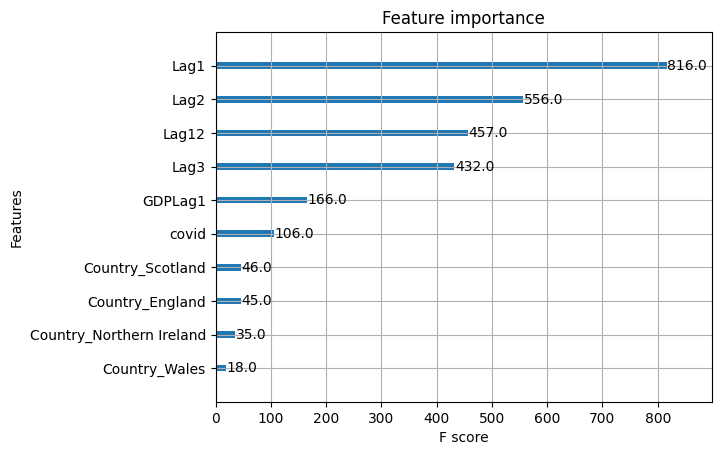

In [36]:
from xgboost import plot_importance
import matplotlib.pyplot as plt
plot_importance(basemodel)
plt.show()

 <b> The Laggings have some Data Leakage as Features on Testing X. 

### Results Without Data Leakeage (Assuming Predictions as True Values)

In [37]:
test_agg_X2 = test_agg_X.copy()

In [38]:
total_months_predict = 12

In [39]:
rows_per_month = 4

In [40]:
test_agg_X2["Prediction"] = -9999
test_agg_X2.head(2)

Country_England  Country_Northern Ireland  Country_Scotland  \
Date                                                                      
2022-06-01              1.0                       0.0               0.0   
2022-06-01              0.0                       1.0               0.0   

            Country_Wales  covid       Lag1      Lag2       Lag3     Lag12  \
Date                                                                         
2022-06-01            0.0      0  1141750.0  913370.0  1094230.0  896260.0   
2022-06-01            0.0      0    20240.0   18205.0    20185.0   18590.0   

            GDPLag1  Prediction  
Date                             
2022-06-01      0.5       -9999  
2022-06-01      0.5       -9999

In [41]:
# Logic to run 1 by 1 the predictions and use the predicted values as laggings for Future!
for x in range(1, total_months_predict + 1):

    df_tmp = test_agg_X2.iloc[(x-1)*rows_per_month:x*rows_per_month]
    df_tmp.drop(columns = "Prediction", inplace = True)
    
    predict_val_2= np.round(basemodel.predict(df_tmp)).tolist()
    
    #Changing predictions on test_agg_X2
    test_agg_X2.loc[(x-1)*rows_per_month:x*rows_per_month, "Prediction"] = predict_val_2
    
    #Changing Lags with predictions on test_agg_X2
    if x+11 < total_months_predict:
        test_agg_X2.loc[x*rows_per_month:x*rows_per_month+rows_per_month, "Lag1"] = predict_val_2
        test_agg_X2.loc[x*rows_per_month+rows_per_month:x*rows_per_month+rows_per_month * 2, "Lag2"] = predict_val_2
        test_agg_X2.loc[x*rows_per_month+rows_per_month * 2:x*rows_per_month+rows_per_month * 3, "Lag3"] = predict_val_2
        test_agg_X2.loc[x*rows_per_month+rows_per_month * 11:x*rows_per_month+rows_per_month * 12, "Lag12"] = predict_val_2
    
    elif x+2 < total_months_predict:
        test_agg_X2.loc[x*rows_per_month:x*rows_per_month+rows_per_month, "Lag1"] = predict_val_2
        test_agg_X2.loc[x*rows_per_month+rows_per_month:x*rows_per_month+rows_per_month * 2, "Lag2"] = predict_val_2
        test_agg_X2.loc[x*rows_per_month+rows_per_month * 2:x*rows_per_month+rows_per_month * 3, "Lag3"] = predict_val_2
    
    elif x+1 < total_months_predict:
        test_agg_X2.loc[x*rows_per_month:x*rows_per_month+rows_per_month, "Lag1"] = predict_val_2
        test_agg_X2.loc[x*rows_per_month+rows_per_month:x*rows_per_month+rows_per_month * 2, "Lag2"] = predict_val_2
        
    elif x < total_months_predict:
        test_agg_X2.loc[x*rows_per_month:x*rows_per_month+rows_per_month, "Lag1"] = predict_val_2
    
    

/tmp/ipykernel_139935/1047760527.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_139935/1047760527.py:10: FutureWarning:

Slicing a positional slice with .loc is not supported, and will raise TypeError in a future version.  Use .loc with labels or .iloc with positions instead.

/tmp/ipykernel_139935/1047760527.py:20: FutureWarning:

Slicing a positional slice with .loc is not supported, and will raise TypeError in a future version.  Use .loc with labels or .iloc with positions instead.

/tmp/ipykernel_139935/1047760527.py:21: FutureWarning:

Slicing a positional slice with .loc is not supported, and will raise TypeError in a future version.  Use .loc with labels or .iloc with positions instead.

/tmp/ipykernel_139935/1047760527.py:22: FutureWarning:

Slicing a positional slice with .

/tmp/ipykernel_139935/1047760527.py:10: FutureWarning:

Slicing a positional slice with .loc is not supported, and will raise TypeError in a future version.  Use .loc with labels or .iloc with positions instead.

/tmp/ipykernel_139935/1047760527.py:29: FutureWarning:

Slicing a positional slice with .loc is not supported, and will raise TypeError in a future version.  Use .loc with labels or .iloc with positions instead.

/tmp/ipykernel_139935/1047760527.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_139935/1047760527.py:10: FutureWarning:

Slicing a positional slice with .loc is not supported, and will raise TypeError in a future version.  Use .loc with labels or .iloc with positions instead.



In [42]:
test_agg_X2.head(2)

Country_England  Country_Northern Ireland  Country_Scotland  \
Date                                                                      
2022-06-01              1.0                       0.0               0.0   
2022-06-01              0.0                       1.0               0.0   

            Country_Wales  covid       Lag1      Lag2       Lag3     Lag12  \
Date                                                                         
2022-06-01            0.0      0  1141750.0  913370.0  1094230.0  896260.0   
2022-06-01            0.0      0    20240.0   18205.0    20185.0   18590.0   

            GDPLag1  Prediction  
Date                             
2022-06-01      0.5    925613.0  
2022-06-01      0.5     15810.0

### RMSE Results

In [43]:
rmse_valb_2=rmspe(test_agg_y, test_agg_X2["Prediction"])

print(f"Training Error: {rmse_trainb} \nValidation Error: {rmse_valb} \nValidation Error / WithOut Data Leakage: {rmse_valb_2}")

Training Error: Data    0.000284
dtype: float64 
Validation Error: Data    0.207868
dtype: float64 
Validation Error / WithOut Data Leakage: Data    0.197907
dtype: float64


/home/tgarciar/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3430: FutureWarning:

In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'



## Plotting Results

In [44]:
predicted_df = pd.DataFrame({'Value': predict_val, "Country": Date_Country.Country.values, "Type": "Predicted"}, index=test_agg_X.index)
actual_df = pd.DataFrame({'Value': test_agg_y["Data"].values, "Country": Date_Country.Country.values, "Type": "Actual"}, index=test_agg_X.index)
predicted_df2 = pd.DataFrame({'Value': test_agg_X2.Prediction.values, "Country": Date_Country.Country.values, "Type": "Predicted/WDL"}, index=test_agg_X.index)

predicted_df.shape, actual_df.shape,predicted_df2.shape,

((48, 3), (48, 3), (48, 3))

In [45]:
#plot_df = pd.concat([actual_df, predicted_df], axis=0)
plot_df = actual_df
plot_df = pd.concat([plot_df, predicted_df2], axis=0)
plot_df

Value           Country           Type
Date                                                  
2022-06-01  1026015.0           England         Actual
2022-06-01    18370.0  Northern Ireland         Actual
2022-06-01    68940.0          Scotland         Actual
2022-06-01    40640.0             Wales         Actual
2022-07-01  1053730.0           England         Actual
...               ...               ...            ...
2023-04-01    41303.0             Wales  Predicted/WDL
2023-05-01   968476.0           England  Predicted/WDL
2023-05-01    17157.0  Northern Ireland  Predicted/WDL
2023-05-01    64905.0          Scotland  Predicted/WDL
2023-05-01    41588.0             Wales  Predicted/WDL

[96 rows x 3 columns]

In [46]:
fig = px.line(plot_df, x=plot_df.index, y='Value', color='Country', line_dash='Type', title='Total NEW ADS by Country')
fig.update_layout(height=800, width=1600)

fig.show()


# Modelling with all SOC Data per Country (Most Granular Possible)

Similar process than (3) but without grouping the dataset:

## Preparing the dataset for XGBooster

In [47]:
df_t19_ts.head(2)

Country  SOC 4 digit code                      SOC 4 digit label  \
0  England              1111  Chief executives and senior officials   
1  England              1112   Elected officers and representatives   

        Date  Data    Month  
0 2017-01-01   730  2017-01  
1 2017-01-01   530  2017-01

In [48]:
# Creatung OHE on countries:

ohe = OneHotEncoder(sparse_output = False)

ohe.fit(df_t19_ts[['Country']])


df_t19_ts[ohe.get_feature_names_out()] = ohe.transform(df_t19_ts[["Country"]])


In [49]:
df_t19_ts.head(2)

Country  SOC 4 digit code                      SOC 4 digit label  \
0  England              1111  Chief executives and senior officials   
1  England              1112   Elected officers and representatives   

        Date  Data    Month  Country_England  Country_Northern Ireland  \
0 2017-01-01   730  2017-01              1.0                       0.0   
1 2017-01-01   530  2017-01              1.0                       0.0   

   Country_Scotland  Country_Wales  
0               0.0            0.0  
1               0.0            0.0

In [50]:
# Creating COVID feature:

df_t19_ts['covid'] = df_t19_ts['Date'].apply(lambda x: 1 if x.month >= 2 and x.year == 2020 and x.month <= 12 else 0)
df_t19_ts.head(2)

Country  SOC 4 digit code                      SOC 4 digit label  \
0  England              1111  Chief executives and senior officials   
1  England              1112   Elected officers and representatives   

        Date  Data    Month  Country_England  Country_Northern Ireland  \
0 2017-01-01   730  2017-01              1.0                       0.0   
1 2017-01-01   530  2017-01              1.0                       0.0   

   Country_Scotland  Country_Wales  covid  
0               0.0            0.0      0  
1               0.0            0.0      0

In [51]:
# Making Date the Index:
df_t19_ts.set_index('Date', inplace=True)
df_t19_ts.head(2)

Country  SOC 4 digit code                      SOC 4 digit label  \
Date                                                                           
2017-01-01  England              1111  Chief executives and senior officials   
2017-01-01  England              1112   Elected officers and representatives   

            Data    Month  Country_England  Country_Northern Ireland  \
Date                                                                   
2017-01-01   730  2017-01              1.0                       0.0   
2017-01-01   530  2017-01              1.0                       0.0   

            Country_Scotland  Country_Wales  covid  
Date                                                
2017-01-01               0.0            0.0      0  
2017-01-01               0.0            0.0      0

In [52]:
# Creating a copy, droping SOC 4 digit label
df_t19_ts_copy = df_t19_ts.copy()
df_t19_ts.drop(columns = ["SOC 4 digit label"], inplace=True)

In [53]:
# Creating Laggings for the model:
df_t19_ts['Lag1'] = df_t19_ts['Data'].shift(1*412*4)
df_t19_ts['Lag2'] = df_t19_ts['Data'].shift(2*412*4)
df_t19_ts['Lag3'] = df_t19_ts['Data'].shift(3*412*4)
df_t19_ts['Lag12'] = df_t19_ts['Data'].shift(12*412*4)
df_t19_ts.head(412*4+4)

Country  SOC 4 digit code  Data    Month  \
Date                                                            
2017-01-01           England              1111   730  2017-01   
2017-01-01           England              1112   530  2017-01   
2017-01-01           England              1121  5435  2017-01   
2017-01-01           England              1122  4010  2017-01   
2017-01-01           England              1123   140  2017-01   
...                      ...               ...   ...      ...   
2017-01-01  Northern Ireland              9269    10  2017-01   
2017-02-01           England              1111   590  2017-02   
2017-02-01           England              1112   440  2017-02   
2017-02-01           England              1121  4065  2017-02   
2017-02-01           England              1122  3295  2017-02   

            Country_England  Country_Northern Ireland  Country_Scotland  \
Date                                                                      
2017-01-01              1.0                       0.0               0.0   
2017-01-01              1.0                       0.0               0.0   
2017-01-01              1.0                       0.0               0.0   
2017-01-01              1.0                       0.0               0.0   
2017-01-01              1.0                       0.0               0.0   
...                     ...                       ...               ...   
2017-01-01              0.0                       1.0               0.0   
2017-02-01              1.0                       0.0               0.0   
2017-02-01              1.0                       0.0               0.0   
2017-02-01              1.0                       0.0               0.0   
2017-02-01              1.0                       0.0               0.0   

            Country_Wales  covid    Lag1  Lag2  Lag3  Lag12  
Date                                                         
2017-01-01            0.0      0     NaN   NaN   NaN    NaN  
2017-01-01            0.0      0     NaN   NaN   NaN    NaN  
2017-01-01            0.0      0     NaN   NaN   NaN    NaN  
2017-01-01            0.0      0     NaN   NaN   NaN    NaN  
2017-01-01            0.0      0     NaN   NaN   NaN    NaN  
...                   ...    ...     ...   ...   ...    ...  
2017-01-01            0.0      0     NaN   NaN   NaN    NaN  
2017-02-01            0.0      0   730.0   NaN   NaN    NaN  
2017-02-01            0.0      0   530.0   NaN   NaN    NaN  
2017-02-01            0.0      0  5435.0   NaN   NaN    NaN  
2017-02-01            0.0      0  4010.0   NaN   NaN    NaN  

[1652 rows x 13 columns]

### Adding GDP Growth per Quarter Data --> ONS

In [54]:
#Adding GDP Data:

df_t19_ts['GDPQGrowth'] = gdp.set_index('QInit')['GDP Qgrowth']
df_t19_ts['GDPLag1'] = df_t19_ts['GDPQGrowth'].shift(412*4*3)
df_t19_ts.tail(412*4*1+15)


Country  SOC 4 digit code  Data    Month  \
Date                                                            
2023-04-01  Northern Ireland              9233     0  2023-04   
2023-04-01  Northern Ireland              9241     0  2023-04   
2023-04-01  Northern Ireland              9249     0  2023-04   
2023-04-01  Northern Ireland              9251    20  2023-04   
2023-04-01  Northern Ireland              9252   180  2023-04   
...                      ...               ...   ...      ...   
2023-05-01  Northern Ireland              9264    80  2023-05   
2023-05-01  Northern Ireland              9265    75  2023-05   
2023-05-01  Northern Ireland              9266    35  2023-05   
2023-05-01  Northern Ireland              9267    75  2023-05   
2023-05-01  Northern Ireland              9269    25  2023-05   

            Country_England  Country_Northern Ireland  Country_Scotland  \
Date                                                                      
2023-04-01              0.0                       1.0               0.0   
2023-04-01              0.0                       1.0               0.0   
2023-04-01              0.0                       1.0               0.0   
2023-04-01              0.0                       1.0               0.0   
2023-04-01              0.0                       1.0               0.0   
...                     ...                       ...               ...   
2023-05-01              0.0                       1.0               0.0   
2023-05-01              0.0                       1.0               0.0   
2023-05-01              0.0                       1.0               0.0   
2023-05-01              0.0                       1.0               0.0   
2023-05-01              0.0                       1.0               0.0   

            Country_Wales  covid   Lag1   Lag2   Lag3  Lag12  GDPQGrowth  \
Date                                                                       
2023-04-01            0.0      0    0.0    0.0    0.0    0.0         0.0   
2023-04-01            0.0      0    0.0    5.0    5.0   10.0         0.0   
2023-04-01            0.0      0    0.0    0.0    5.0    5.0         0.0   
2023-04-01            0.0      0   25.0   20.0   35.0   40.0         0.0   
2023-04-01            0.0      0  220.0  190.0  210.0  245.0         0.0   
...                   ...    ...    ...    ...    ...    ...         ...   
2023-05-01            0.0      0   85.0   65.0   75.0   85.0         NaN   
2023-05-01            0.0      0   70.0  100.0   70.0   85.0         NaN   
2023-05-01            0.0      0   30.0   35.0   30.0   35.0         NaN   
2023-05-01            0.0      0   65.0   80.0   60.0   80.0         NaN   
2023-05-01            0.0      0   20.0   20.0   15.0   25.0         NaN   

            GDPLag1  
Date                 
2023-04-01      0.2  
2023-04-01      0.2  
2023-04-01      0.2  
2023-04-01      0.2  
2023-04-01      0.2  
...             ...  
2023-05-01      NaN  
2023-05-01      NaN  
2023-05-01      NaN  
2023-05-01      NaN  
2023-05-01      NaN  

[1663 rows x 15 columns]

In [55]:
#Adding GDP for 01-01-2017 (From Q4 2016)
df_t19_ts.loc['2017-01-01', 'GDPLag1'] = 0.6

#Adding for months with no GDP data (The one on top)
df_t19_ts['GDPLag1'] = df_t19_ts['GDPLag1'].fillna(method='ffill')

#Dropping GDPQGrowth:
df_t19_ts.drop(columns = ["GDPQGrowth"], inplace=True)
df_t19_ts.head()

Country  SOC 4 digit code  Data    Month  Country_England  \
Date                                                                    
2017-01-01  England              1111   730  2017-01              1.0   
2017-01-01  England              1112   530  2017-01              1.0   
2017-01-01  England              1121  5435  2017-01              1.0   
2017-01-01  England              1122  4010  2017-01              1.0   
2017-01-01  England              1123   140  2017-01              1.0   

            Country_Northern Ireland  Country_Scotland  Country_Wales  covid  \
Date                                                                           
2017-01-01                       0.0               0.0            0.0      0   
2017-01-01                       0.0               0.0            0.0      0   
2017-01-01                       0.0               0.0            0.0      0   
2017-01-01                       0.0               0.0            0.0      0   
2017-01-01                       0.0               0.0            0.0      0   

            Lag1  Lag2  Lag3  Lag12  GDPLag1  
Date                                          
2017-01-01   NaN   NaN   NaN    NaN      0.6  
2017-01-01   NaN   NaN   NaN    NaN      0.6  
2017-01-01   NaN   NaN   NaN    NaN      0.6  
2017-01-01   NaN   NaN   NaN    NaN      0.6  
2017-01-01   NaN   NaN   NaN    NaN      0.6

### Train - Test Split: 85%-15% (Similar to this: Train -> Until June 2022)

In [56]:
# Separating Train and Test - 85-15
train_size = 0.85
index = round(train_size * df_t19_ts.shape[0])-742 #-742 to get all countries until may 2022 for training

agg_ts_train = df_t19_ts.iloc[:index]
agg_ts_test = df_t19_ts.iloc[index:]

agg_ts_train.tail(5)

Country  SOC 4 digit code  Data    Month  \
Date                                                            
2022-05-01  Northern Ireland              9264    85  2022-05   
2022-05-01  Northern Ireland              9265    85  2022-05   
2022-05-01  Northern Ireland              9266    35  2022-05   
2022-05-01  Northern Ireland              9267    80  2022-05   
2022-05-01  Northern Ireland              9269    25  2022-05   

            Country_England  Country_Northern Ireland  Country_Scotland  \
Date                                                                      
2022-05-01              0.0                       1.0               0.0   
2022-05-01              0.0                       1.0               0.0   
2022-05-01              0.0                       1.0               0.0   
2022-05-01              0.0                       1.0               0.0   
2022-05-01              0.0                       1.0               0.0   

            Country_Wales  covid  Lag1  Lag2   Lag3  Lag12  GDPLag1  
Date                                                                 
2022-05-01            0.0      0  85.0  90.0   90.0   85.0      0.5  
2022-05-01            0.0      0  95.0  95.0  100.0   95.0      0.5  
2022-05-01            0.0      0  40.0  35.0   20.0   25.0      0.5  
2022-05-01            0.0      0  55.0  85.0   65.0   40.0      0.5  
2022-05-01            0.0      0  35.0  25.0   15.0   25.0      0.5

In [57]:
# Separating X and y:
train_agg_X = agg_ts_train.drop(columns = ["Data"])
train_agg_y = agg_ts_train[["Data"]]
test_agg_X = agg_ts_test.drop(columns = ["Data"])
test_agg_y = agg_ts_test[["Data"]]

In [58]:
# Creating copy for using it later
Date_Country = test_agg_X.copy()
Date_Country

Country  SOC 4 digit code    Month  Country_England  \
Date                                                                       
2022-06-01           England              1111  2022-06              1.0   
2022-06-01           England              1112  2022-06              1.0   
2022-06-01           England              1121  2022-06              1.0   
2022-06-01           England              1122  2022-06              1.0   
2022-06-01           England              1123  2022-06              1.0   
...                      ...               ...      ...              ...   
2023-05-01  Northern Ireland              9264  2023-05              0.0   
2023-05-01  Northern Ireland              9265  2023-05              0.0   
2023-05-01  Northern Ireland              9266  2023-05              0.0   
2023-05-01  Northern Ireland              9267  2023-05              0.0   
2023-05-01  Northern Ireland              9269  2023-05              0.0   

            Country_Northern Ireland  Country_Scotland  Country_Wales  covid  \
Date                                                                           
2022-06-01                       0.0               0.0            0.0      0   
2022-06-01                       0.0               0.0            0.0      0   
2022-06-01                       0.0               0.0            0.0      0   
2022-06-01                       0.0               0.0            0.0      0   
2022-06-01                       0.0               0.0            0.0      0   
...                              ...               ...            ...    ...   
2023-05-01                       1.0               0.0            0.0      0   
2023-05-01                       1.0               0.0            0.0      0   
2023-05-01                       1.0               0.0            0.0      0   
2023-05-01                       1.0               0.0            0.0      0   
2023-05-01                       1.0               0.0            0.0      0   

              Lag1    Lag2    Lag3   Lag12  GDPLag1  
Date                                                 
2022-06-01  1060.0   815.0   940.0   725.0      0.5  
2022-06-01   995.0   810.0  1015.0  1190.0      0.5  
2022-06-01  6295.0  4745.0  5710.0  4525.0      0.5  
2022-06-01  4560.0  3355.0  4075.0  3885.0      0.5  
2022-06-01   160.0   115.0   150.0   120.0      0.5  
...            ...     ...     ...     ...      ...  
2023-05-01    85.0    65.0    75.0    85.0      0.2  
2023-05-01    70.0   100.0    70.0    85.0      0.2  
2023-05-01    30.0    35.0    30.0    35.0      0.2  
2023-05-01    65.0    80.0    60.0    80.0      0.2  
2023-05-01    20.0    20.0    15.0    25.0      0.2  

[19776 rows x 13 columns]

In [59]:
train_agg_X.drop(columns='Country', inplace=True)
test_agg_X.drop(columns='Country', inplace=True)

In [60]:
# Dropping Month
train_agg_X.drop(columns='Month', inplace=True)
test_agg_X.drop(columns='Month', inplace=True)

In [61]:
# Checking that is same shapes
test_agg_X.shape, test_agg_y.shape

((19776, 11), (19776, 1))

In [62]:
test_agg_X.head(2)

SOC 4 digit code  Country_England  Country_Northern Ireland  \
Date                                                                      
2022-06-01              1111              1.0                       0.0   
2022-06-01              1112              1.0                       0.0   

            Country_Scotland  Country_Wales  covid    Lag1   Lag2    Lag3  \
Date                                                                        
2022-06-01               0.0            0.0      0  1060.0  815.0   940.0   
2022-06-01               0.0            0.0      0   995.0  810.0  1015.0   

             Lag12  GDPLag1  
Date                         
2022-06-01   725.0      0.5  
2022-06-01  1190.0      0.5

## Modelling

In [63]:
# Used as exploration to tune the model:

### XGBOOSTER MODEL - GRANULAR DATA:

# from sklearn.model_selection import GridSearchCV

# param_grid = {

#    'learning_rate': [0.01, 0.1, 0.2],

#    'max_depth': [3, 5, 7],

#    'subsample': [0.8, 0.9, 1.0]

#}

#grid_search = GridSearchCV(XGBRegressor(random_state=1,n_jobs=-1), param_grid, cv=3, verbose=2)

#grid_search.fit(train_agg_X, train_agg_y)

#best_params = grid_search.best_params_


In [64]:
#best_params

In [65]:
#basemodel= XGBRegressor(random_state=1,n_jobs=-1, learning_rate= 0.1, max_depth= 3, subsample= 0.8).fit(train_agg_X, train_agg_y)
basemodel= XGBRegressor(n_jobs=-1).fit(train_agg_X, train_agg_y)

#Predictions
predict_train= np.round(basemodel.predict(train_agg_X))
predict_val= basemodel.predict(test_agg_X)
predict_val= np.round(predict_val)

#RMSPE
rmse_trainb=rmspe(train_agg_y, predict_train)
rmse_valb=rmspe(test_agg_y, predict_val)

print(f"Training Error: {rmse_trainb} \nValidation Error: {rmse_valb}")

Training Error: Data    0.436651
dtype: float64 
Validation Error: Data    0.48507
dtype: float64


/home/tgarciar/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3430: FutureWarning:

In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'

/home/tgarciar/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3430: FutureWarning:

In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'



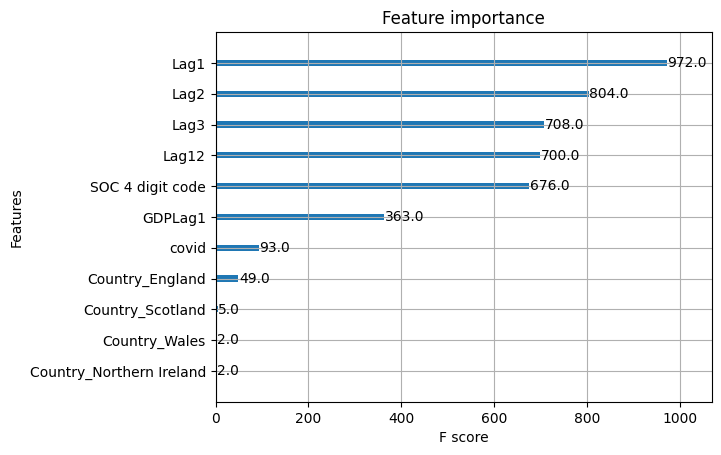

In [66]:
plot_importance(basemodel)
plt.show()

### Results without Data Leakage

In [67]:
test_agg_X2 = test_agg_X.copy()
test_agg_X2.loc["2022-06-01"]

SOC 4 digit code  Country_England  Country_Northern Ireland  \
Date                                                                      
2022-06-01              1111              1.0                       0.0   
2022-06-01              1112              1.0                       0.0   
2022-06-01              1121              1.0                       0.0   
2022-06-01              1122              1.0                       0.0   
2022-06-01              1123              1.0                       0.0   
...                      ...              ...                       ...   
2022-06-01              9264              0.0                       1.0   
2022-06-01              9265              0.0                       1.0   
2022-06-01              9266              0.0                       1.0   
2022-06-01              9267              0.0                       1.0   
2022-06-01              9269              0.0                       1.0   

            Country_Scotland  Country_Wales  covid    Lag1    Lag2    Lag3  \
Date                                                                         
2022-06-01               0.0            0.0      0  1060.0   815.0   940.0   
2022-06-01               0.0            0.0      0   995.0   810.0  1015.0   
2022-06-01               0.0            0.0      0  6295.0  4745.0  5710.0   
2022-06-01               0.0            0.0      0  4560.0  3355.0  4075.0   
2022-06-01               0.0            0.0      0   160.0   115.0   150.0   
...                      ...            ...    ...     ...     ...     ...   
2022-06-01               0.0            0.0      0    85.0    85.0    90.0   
2022-06-01               0.0            0.0      0    85.0    95.0    95.0   
2022-06-01               0.0            0.0      0    35.0    40.0    35.0   
2022-06-01               0.0            0.0      0    80.0    55.0    85.0   
2022-06-01               0.0            0.0      0    25.0    35.0    25.0   

             Lag12  GDPLag1  
Date                         
2022-06-01   725.0      0.5  
2022-06-01  1190.0      0.5  
2022-06-01  4525.0      0.5  
2022-06-01  3885.0      0.5  
2022-06-01   120.0      0.5  
...            ...      ...  
2022-06-01    70.0      0.5  
2022-06-01    85.0      0.5  
2022-06-01    30.0      0.5  
2022-06-01    50.0      0.5  
2022-06-01    25.0      0.5  

[1648 rows x 11 columns]

In [68]:
total_months_predict = 12

In [69]:
rows_per_month = 1648

In [70]:
test_agg_X2["Prediction"] = -9999
test_agg_X2.head()

SOC 4 digit code  Country_England  Country_Northern Ireland  \
Date                                                                      
2022-06-01              1111              1.0                       0.0   
2022-06-01              1112              1.0                       0.0   
2022-06-01              1121              1.0                       0.0   
2022-06-01              1122              1.0                       0.0   
2022-06-01              1123              1.0                       0.0   

            Country_Scotland  Country_Wales  covid    Lag1    Lag2    Lag3  \
Date                                                                         
2022-06-01               0.0            0.0      0  1060.0   815.0   940.0   
2022-06-01               0.0            0.0      0   995.0   810.0  1015.0   
2022-06-01               0.0            0.0      0  6295.0  4745.0  5710.0   
2022-06-01               0.0            0.0      0  4560.0  3355.0  4075.0   
2022-06-01               0.0            0.0      0   160.0   115.0   150.0   

             Lag12  GDPLag1  Prediction  
Date                                     
2022-06-01   725.0      0.5       -9999  
2022-06-01  1190.0      0.5       -9999  
2022-06-01  4525.0      0.5       -9999  
2022-06-01  3885.0      0.5       -9999  
2022-06-01   120.0      0.5       -9999

In [71]:
for x in range(1, total_months_predict + 1):

    df_tmp = test_agg_X2.iloc[(x-1)*rows_per_month:x*rows_per_month]
    df_tmp.drop(columns = "Prediction", inplace = True)
    
    predict_val_2= np.round(basemodel.predict(df_tmp)).tolist()
    
    #Changing predictions on test_agg_X2
    test_agg_X2.loc[(x-1)*rows_per_month:x*rows_per_month, "Prediction"] = predict_val_2
    
    #Changing Lags with predictions on test_agg_X2
    if x+11 < total_months_predict:
        test_agg_X2.loc[x*rows_per_month:x*rows_per_month+rows_per_month, "Lag1"] = predict_val_2
        test_agg_X2.loc[x*rows_per_month+rows_per_month:x*rows_per_month+rows_per_month * 2, "Lag2"] = predict_val_2
        test_agg_X2.loc[x*rows_per_month+rows_per_month * 2:x*rows_per_month+rows_per_month * 3, "Lag3"] = predict_val_2
        test_agg_X2.loc[x*rows_per_month+rows_per_month * 11:x*rows_per_month+rows_per_month * 12, "Lag12"] = predict_val_2
    
    elif x+2 < total_months_predict:
        test_agg_X2.loc[x*rows_per_month:x*rows_per_month+rows_per_month, "Lag1"] = predict_val_2
        test_agg_X2.loc[x*rows_per_month+rows_per_month:x*rows_per_month+rows_per_month * 2, "Lag2"] = predict_val_2
        test_agg_X2.loc[x*rows_per_month+rows_per_month * 2:x*rows_per_month+rows_per_month * 3, "Lag3"] = predict_val_2
    
    elif x+1 < total_months_predict:
        test_agg_X2.loc[x*rows_per_month:x*rows_per_month+rows_per_month, "Lag1"] = predict_val_2
        test_agg_X2.loc[x*rows_per_month+rows_per_month:x*rows_per_month+rows_per_month * 2, "Lag2"] = predict_val_2
        
    elif x < total_months_predict:
        test_agg_X2.loc[x*rows_per_month:x*rows_per_month+rows_per_month, "Lag1"] = predict_val_2
    
    

/tmp/ipykernel_139935/398479920.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_139935/398479920.py:9: FutureWarning:

Slicing a positional slice with .loc is not supported, and will raise TypeError in a future version.  Use .loc with labels or .iloc with positions instead.

/tmp/ipykernel_139935/398479920.py:19: FutureWarning:

Slicing a positional slice with .loc is not supported, and will raise TypeError in a future version.  Use .loc with labels or .iloc with positions instead.

/tmp/ipykernel_139935/398479920.py:20: FutureWarning:

Slicing a positional slice with .loc is not supported, and will raise TypeError in a future version.  Use .loc with labels or .iloc with positions instead.

/tmp/ipykernel_139935/398479920.py:21: FutureWarning:

Slicing a positional slice with .loc is

/tmp/ipykernel_139935/398479920.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_139935/398479920.py:9: FutureWarning:

Slicing a positional slice with .loc is not supported, and will raise TypeError in a future version.  Use .loc with labels or .iloc with positions instead.

/tmp/ipykernel_139935/398479920.py:19: FutureWarning:

Slicing a positional slice with .loc is not supported, and will raise TypeError in a future version.  Use .loc with labels or .iloc with positions instead.

/tmp/ipykernel_139935/398479920.py:20: FutureWarning:

Slicing a positional slice with .loc is not supported, and will raise TypeError in a future version.  Use .loc with labels or .iloc with positions instead.

/tmp/ipykernel_139935/398479920.py:21: FutureWarning:

Slicing a positional slice with .loc is

In [72]:
rmse_valb_2=rmspe(test_agg_y, test_agg_X2["Prediction"])

print(f"Training Error: {rmse_trainb} \nValidation Error: {rmse_valb} \nValidation Error / WithOut Data Leakage: {rmse_valb_2}")

Training Error: Data    0.436651
dtype: float64 
Validation Error: Data    0.48507
dtype: float64 
Validation Error / WithOut Data Leakage: Data    0.763935
dtype: float64


/home/tgarciar/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3430: FutureWarning:

In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'



## Plotting Results

In [73]:
predicted_df = pd.DataFrame({'Value': predict_val, "Country": Date_Country.Country.values,"SOC4": Date_Country["SOC 4 digit code"].values, "Type": "Predicted"}, index=test_agg_X.index)
actual_df = pd.DataFrame({'Value': test_agg_y["Data"].values, "Country": Date_Country.Country.values,"SOC4": Date_Country["SOC 4 digit code"].values, "Type": "Actual"}, index=test_agg_X.index)
predicted_df2 = pd.DataFrame({'Value': test_agg_X2.Prediction.values, "Country": Date_Country.Country.values, "SOC4": Date_Country["SOC 4 digit code"].values, "Type": "Predicted/WDL"}, index=test_agg_X.index)

predicted_df.shape, actual_df.shape , predicted_df2.shape,

((19776, 4), (19776, 4), (19776, 4))

In [74]:
predicted_df

Value           Country  SOC4       Type
Date                                                 
2022-06-01   904.0           England  1111  Predicted
2022-06-01  1035.0           England  1112  Predicted
2022-06-01  5114.0           England  1121  Predicted
2022-06-01  4267.0           England  1122  Predicted
2022-06-01   142.0           England  1123  Predicted
...            ...               ...   ...        ...
2023-05-01    84.0  Northern Ireland  9264  Predicted
2023-05-01    88.0  Northern Ireland  9265  Predicted
2023-05-01    32.0  Northern Ireland  9266  Predicted
2023-05-01    72.0  Northern Ireland  9267  Predicted
2023-05-01    20.0  Northern Ireland  9269  Predicted

[19776 rows x 4 columns]

In [75]:
predicted_df2

Value           Country  SOC4           Type
Date                                                     
2022-06-01   904.0           England  1111  Predicted/WDL
2022-06-01  1035.0           England  1112  Predicted/WDL
2022-06-01  5114.0           England  1121  Predicted/WDL
2022-06-01  4267.0           England  1122  Predicted/WDL
2022-06-01   142.0           England  1123  Predicted/WDL
...            ...               ...   ...            ...
2023-05-01    90.0  Northern Ireland  9264  Predicted/WDL
2023-05-01    90.0  Northern Ireland  9265  Predicted/WDL
2023-05-01    36.0  Northern Ireland  9266  Predicted/WDL
2023-05-01    84.0  Northern Ireland  9267  Predicted/WDL
2023-05-01    33.0  Northern Ireland  9269  Predicted/WDL

[19776 rows x 4 columns]

In [76]:
actual_df

Value           Country  SOC4    Type
Date                                             
2022-06-01    905           England  1111  Actual
2022-06-01    910           England  1112  Actual
2022-06-01   5285           England  1121  Actual
2022-06-01   4080           England  1122  Actual
2022-06-01    135           England  1123  Actual
...           ...               ...   ...     ...
2023-05-01     80  Northern Ireland  9264  Actual
2023-05-01     75  Northern Ireland  9265  Actual
2023-05-01     35  Northern Ireland  9266  Actual
2023-05-01     75  Northern Ireland  9267  Actual
2023-05-01     25  Northern Ireland  9269  Actual

[19776 rows x 4 columns]

In [77]:
predicted_df['SOC2'] = predicted_df['SOC4'].astype(str).str[:2]
predicted_df
actual_df['SOC2'] = actual_df['SOC4'].astype(str).str[:2]
actual_df
predicted_df2['SOC2'] = predicted_df2['SOC4'].astype(str).str[:2]
predicted_df2

Value           Country  SOC4           Type SOC2
Date                                                          
2022-06-01   904.0           England  1111  Predicted/WDL   11
2022-06-01  1035.0           England  1112  Predicted/WDL   11
2022-06-01  5114.0           England  1121  Predicted/WDL   11
2022-06-01  4267.0           England  1122  Predicted/WDL   11
2022-06-01   142.0           England  1123  Predicted/WDL   11
...            ...               ...   ...            ...  ...
2023-05-01    90.0  Northern Ireland  9264  Predicted/WDL   92
2023-05-01    90.0  Northern Ireland  9265  Predicted/WDL   92
2023-05-01    36.0  Northern Ireland  9266  Predicted/WDL   92
2023-05-01    84.0  Northern Ireland  9267  Predicted/WDL   92
2023-05-01    33.0  Northern Ireland  9269  Predicted/WDL   92

[19776 rows x 5 columns]

In [78]:
#group_df= pd.concat([actual_df, predicted_df], axis=0)
group_df= actual_df
group_df = pd.concat([group_df, predicted_df2], axis=0)
group_df

Value           Country  SOC4           Type SOC2
Date                                                          
2022-06-01   905.0           England  1111         Actual   11
2022-06-01   910.0           England  1112         Actual   11
2022-06-01  5285.0           England  1121         Actual   11
2022-06-01  4080.0           England  1122         Actual   11
2022-06-01   135.0           England  1123         Actual   11
...            ...               ...   ...            ...  ...
2023-05-01    90.0  Northern Ireland  9264  Predicted/WDL   92
2023-05-01    90.0  Northern Ireland  9265  Predicted/WDL   92
2023-05-01    36.0  Northern Ireland  9266  Predicted/WDL   92
2023-05-01    84.0  Northern Ireland  9267  Predicted/WDL   92
2023-05-01    33.0  Northern Ireland  9269  Predicted/WDL   92

[39552 rows x 5 columns]

##### Results By SOC2

In [79]:
group_df_2= group_df.groupby(["Date","SOC2","Country","Type"])["Value"].sum().reset_index()

In [80]:
fig = px.line(group_df_2[group_df_2["Country"] == "England"], x="Date", y='Value', line_dash='Type', color = "SOC2" ,title=f'Total NEW ADS by SOC2 - England')
fig.update_layout(height=600, width=1600)
fig.show()

##### Results By SOC4

In [81]:
soc4 = 3111

In [82]:
plt_4soc = group_df[(group_df['SOC4'] == soc4)]
plt_4soc.head()

Value           Country  SOC4    Type SOC2
Date                                                   
2022-06-01  1430.0           England  3111  Actual   31
2022-06-01   110.0          Scotland  3111  Actual   31
2022-06-01    80.0             Wales  3111  Actual   31
2022-06-01    45.0  Northern Ireland  3111  Actual   31
2022-07-01  1610.0           England  3111  Actual   31

In [83]:
fig = px.line(plt_4soc.groupby(["Date","Type"])["Value"].sum().reset_index(), x="Date", y='Value', line_dash='Type', title=f'Total NEW ADS {soc4} UK')
fig.update_layout(height=600, width=1600)
fig.show()


In [84]:
fig = px.line(plt_4soc, x=plt_4soc.index, y='Value', line_dash='Type', color = "Country", title=f'Total NEW ADS {soc4} by Country')
fig.update_layout(height=600, width=1600)
fig.show()

## Retraining the Model (Full Dataset as Training data) and Predicting until December 2025

### Preparing the Predicting Dataset

In [85]:
# Assumptions: 

Real growth GDP --> Office National Statistics (UK)

- 2023-Q2: 0 %
- 2023-Q3: -0.1 %
- 2023-Q4: -0.3 %

GDP growth forecasts:
In their March 2024 Economic and fiscal outlook, the Office for Budget Responsibility’s (OBR) GDP growth forecast was 0.8% in 2024 and 1.9% in 2025.

The Treasury’s April 2024 survey of independent forecasts showed an average forecast of 0.5% for 2024 and 1.3% for 2025.

We are going to use the OBR growth forecast as the "positive" forecast and the Independent Forecast as a "negative threshold". That means that:

- Low threshold: Independent Forecasts
- High threshold: Office for Buget Responsability


In [86]:
LT2024 = round((1.005 ** 0.25 -1)*100,4)
HT2024 = round((1.008 ** 0.25 -1)*100,4)
LT2025 = round((1.013 ** 0.25 -1)*100,4)
HT2025 = round((1.019 ** 0.25 -1)*100,4)
print(LT2024,HT2024,LT2025,HT2025)

0.1248 0.1994 0.3234 0.4717


In [87]:
# This create the random GDP Growth. We seed it on a random result to compare model results.

#gdp_dict = {
#    "2023-04-01" : 0,
#    "2023-07-01" : -0.1,
#    "2023-10-01" : -0.3,
#    "2024-01-01" : round(random.uniform(LT2024, HT2024),2),
#    "2024-04-01" : round(random.uniform(LT2024, HT2024),2),
#    "2024-07-01" : round(random.uniform(LT2024, HT2024),2),
#    "2024-10-01" : round(random.uniform(LT2024, HT2024),2),
#    "2025-01-01" : round(random.uniform(LT2025, HT2025),2),
#    "2025-04-01" : round(random.uniform(LT2025, HT2025),2),
#    "2025-07-01" : round(random.uniform(LT2025, HT2025),2),
#    "2025-10-01" : round(random.uniform(LT2025, HT2025),2)
#}

In [88]:
# Seeded from random to compare results:
gdp_dict = {'2023-04-01': 0,
 '2023-07-01': -0.1,
 '2023-10-01': -0.3,
 '2024-01-01': 0.17,
 '2024-04-01': 0.13,
 '2024-07-01': 0.2,
 '2024-10-01': 0.18,
 '2025-01-01': 0.45,
 '2025-04-01': 0.43,
 '2025-07-01': 0.42,
 '2025-10-01': 0.39}

In [89]:
gdp_pred = pd.DataFrame(gdp_dict.items())
gdp_pred = gdp_pred.rename(columns={0: "Date",1: "Gdp_growth"})
gdp_pred['Date'] = pd.to_datetime(gdp_pred['Date'])
gdp_pred

Date  Gdp_growth
0  2023-04-01        0.00
1  2023-07-01       -0.10
2  2023-10-01       -0.30
3  2024-01-01        0.17
4  2024-04-01        0.13
5  2024-07-01        0.20
6  2024-10-01        0.18
7  2025-01-01        0.45
8  2025-04-01        0.43
9  2025-07-01        0.42
10 2025-10-01        0.39

### Creating New Dataset --> For Predictions

In [90]:
df_t19_ts.tail(2)

Country  SOC 4 digit code  Data    Month  \
Date                                                            
2023-05-01  Northern Ireland              9267    75  2023-05   
2023-05-01  Northern Ireland              9269    25  2023-05   

            Country_England  Country_Northern Ireland  Country_Scotland  \
Date                                                                      
2023-05-01              0.0                       1.0               0.0   
2023-05-01              0.0                       1.0               0.0   

            Country_Wales  covid  Lag1  Lag2  Lag3  Lag12  GDPLag1  
Date                                                                
2023-05-01            0.0      0  65.0  80.0  60.0   80.0      0.2  
2023-05-01            0.0      0  20.0  20.0  15.0   25.0      0.2

In [91]:
df_t19_ts_predict = df_t19_ts.copy()
df_t19_ts_predict.drop(columns = "Month", inplace = True)
df_t19_ts_predict["Training"] = 1
df_t19_ts_predict.head()

Country  SOC 4 digit code  Data  Country_England  \
Date                                                           
2017-01-01  England              1111   730              1.0   
2017-01-01  England              1112   530              1.0   
2017-01-01  England              1121  5435              1.0   
2017-01-01  England              1122  4010              1.0   
2017-01-01  England              1123   140              1.0   

            Country_Northern Ireland  Country_Scotland  Country_Wales  covid  \
Date                                                                           
2017-01-01                       0.0               0.0            0.0      0   
2017-01-01                       0.0               0.0            0.0      0   
2017-01-01                       0.0               0.0            0.0      0   
2017-01-01                       0.0               0.0            0.0      0   
2017-01-01                       0.0               0.0            0.0      0   

            Lag1  Lag2  Lag3  Lag12  GDPLag1  Training  
Date                                                    
2017-01-01   NaN   NaN   NaN    NaN      0.6         1  
2017-01-01   NaN   NaN   NaN    NaN      0.6         1  
2017-01-01   NaN   NaN   NaN    NaN      0.6         1  
2017-01-01   NaN   NaN   NaN    NaN      0.6         1  
2017-01-01   NaN   NaN   NaN    NaN      0.6         1

In [92]:
# Creating Prediction dataset
prediction_data = df_t19_ts.loc['2017-06-01':'2019-12-01'].copy()
prediction_data.drop(columns = "Month", inplace = True)
prediction_data.index = prediction_data.index + pd.DateOffset(years=6)
prediction_data['covid'] = 0
prediction_data['Lag1'] = -9999
prediction_data['Lag2'] = -9999
prediction_data['Lag3'] = -9999
prediction_data['Lag12'] = -9999
prediction_data['GDPLag1'] = -9999
prediction_data['Data'] = np.NaN
prediction_data['Training'] = 0
prediction_data

Country  SOC 4 digit code  Data  Country_England  \
Date                                                                    
2023-06-01           England              1111   NaN              1.0   
2023-06-01           England              1112   NaN              1.0   
2023-06-01           England              1121   NaN              1.0   
2023-06-01           England              1122   NaN              1.0   
2023-06-01           England              1123   NaN              1.0   
...                      ...               ...   ...              ...   
2025-12-01  Northern Ireland              9264   NaN              0.0   
2025-12-01  Northern Ireland              9265   NaN              0.0   
2025-12-01  Northern Ireland              9266   NaN              0.0   
2025-12-01  Northern Ireland              9267   NaN              0.0   
2025-12-01  Northern Ireland              9269   NaN              0.0   

            Country_Northern Ireland  Country_Scotland  Country_Wales  covid  \
Date                                                                           
2023-06-01                       0.0               0.0            0.0      0   
2023-06-01                       0.0               0.0            0.0      0   
2023-06-01                       0.0               0.0            0.0      0   
2023-06-01                       0.0               0.0            0.0      0   
2023-06-01                       0.0               0.0            0.0      0   
...                              ...               ...            ...    ...   
2025-12-01                       1.0               0.0            0.0      0   
2025-12-01                       1.0               0.0            0.0      0   
2025-12-01                       1.0               0.0            0.0      0   
2025-12-01                       1.0               0.0            0.0      0   
2025-12-01                       1.0               0.0            0.0      0   

            Lag1  Lag2  Lag3  Lag12  GDPLag1  Training  
Date                                                    
2023-06-01 -9999 -9999 -9999  -9999    -9999         0  
2023-06-01 -9999 -9999 -9999  -9999    -9999         0  
2023-06-01 -9999 -9999 -9999  -9999    -9999         0  
2023-06-01 -9999 -9999 -9999  -9999    -9999         0  
2023-06-01 -9999 -9999 -9999  -9999    -9999         0  
...          ...   ...   ...    ...      ...       ...  
2025-12-01 -9999 -9999 -9999  -9999    -9999         0  
2025-12-01 -9999 -9999 -9999  -9999    -9999         0  
2025-12-01 -9999 -9999 -9999  -9999    -9999         0  
2025-12-01 -9999 -9999 -9999  -9999    -9999         0  
2025-12-01 -9999 -9999 -9999  -9999    -9999         0  

[51088 rows x 14 columns]

In [93]:
#Joining with last 12 months Time Series to Create Laggings:

In [94]:
predict_temp = df_t19_ts_predict.tail(412*12*4).append(prediction_data)
predict_temp['Lag1'] = predict_temp['Data'].shift(1*412*4)
predict_temp['Lag2'] = predict_temp['Data'].shift(2*412*4)
predict_temp['Lag3'] = predict_temp['Data'].shift(3*412*4)
predict_temp['Lag12'] = predict_temp['Data'].shift(12*412*4)
predict_temp.iloc[412*12*4-5:412*12*4+412*4]

/tmp/ipykernel_139935/2205455234.py:1: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



Country  SOC 4 digit code  Data  Country_England  \
Date                                                                    
2023-05-01  Northern Ireland              9264  80.0              0.0   
2023-05-01  Northern Ireland              9265  75.0              0.0   
2023-05-01  Northern Ireland              9266  35.0              0.0   
2023-05-01  Northern Ireland              9267  75.0              0.0   
2023-05-01  Northern Ireland              9269  25.0              0.0   
...                      ...               ...   ...              ...   
2023-06-01  Northern Ireland              9264   NaN              0.0   
2023-06-01  Northern Ireland              9265   NaN              0.0   
2023-06-01  Northern Ireland              9266   NaN              0.0   
2023-06-01  Northern Ireland              9267   NaN              0.0   
2023-06-01  Northern Ireland              9269   NaN              0.0   

            Country_Northern Ireland  Country_Scotland  Country_Wales  covid  \
Date                                                                           
2023-05-01                       1.0               0.0            0.0      0   
2023-05-01                       1.0               0.0            0.0      0   
2023-05-01                       1.0               0.0            0.0      0   
2023-05-01                       1.0               0.0            0.0      0   
2023-05-01                       1.0               0.0            0.0      0   
...                              ...               ...            ...    ...   
2023-06-01                       1.0               0.0            0.0      0   
2023-06-01                       1.0               0.0            0.0      0   
2023-06-01                       1.0               0.0            0.0      0   
2023-06-01                       1.0               0.0            0.0      0   
2023-06-01                       1.0               0.0            0.0      0   

            Lag1   Lag2   Lag3  Lag12  GDPLag1  Training  
Date                                                      
2023-05-01  85.0   65.0   75.0    NaN      0.2         1  
2023-05-01  70.0  100.0   70.0    NaN      0.2         1  
2023-05-01  30.0   35.0   30.0    NaN      0.2         1  
2023-05-01  65.0   80.0   60.0    NaN      0.2         1  
2023-05-01  20.0   20.0   15.0    NaN      0.2         1  
...          ...    ...    ...    ...      ...       ...  
2023-06-01  80.0   85.0   65.0   75.0  -9999.0         0  
2023-06-01  75.0   70.0  100.0   70.0  -9999.0         0  
2023-06-01  35.0   30.0   35.0   30.0  -9999.0         0  
2023-06-01  75.0   65.0   80.0   50.0  -9999.0         0  
2023-06-01  25.0   20.0   20.0   30.0  -9999.0         0  

[1653 rows x 14 columns]

In [95]:
prediction_data = predict_temp[predict_temp["Training"] == 0]
prediction_data.head(5)

Country  SOC 4 digit code  Data  Country_England  \
Date                                                           
2023-06-01  England              1111   NaN              1.0   
2023-06-01  England              1112   NaN              1.0   
2023-06-01  England              1121   NaN              1.0   
2023-06-01  England              1122   NaN              1.0   
2023-06-01  England              1123   NaN              1.0   

            Country_Northern Ireland  Country_Scotland  Country_Wales  covid  \
Date                                                                           
2023-06-01                       0.0               0.0            0.0      0   
2023-06-01                       0.0               0.0            0.0      0   
2023-06-01                       0.0               0.0            0.0      0   
2023-06-01                       0.0               0.0            0.0      0   
2023-06-01                       0.0               0.0            0.0      0   

              Lag1    Lag2    Lag3   Lag12  GDPLag1  Training  
Date                                                           
2023-06-01   765.0   570.0   735.0   905.0  -9999.0         0  
2023-06-01   665.0   585.0   625.0   910.0  -9999.0         0  
2023-06-01  4355.0  3775.0  4500.0  5285.0  -9999.0         0  
2023-06-01  3450.0  3025.0  3785.0  4080.0  -9999.0         0  
2023-06-01   110.0   105.0   115.0   135.0  -9999.0         0

In [96]:
# Adding GDP LAG-1 to prediciton data:
gdp_pred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Date        11 non-null     datetime64[ns]
 1   Gdp_growth  11 non-null     float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 304.0 bytes


In [97]:
prediction_data_2= prediction_data.copy()

In [98]:
prediction_data_2['GDPQGrowth'] = gdp_pred.set_index('Date')['Gdp_growth']
prediction_data_2['GDPLag1'] = prediction_data_2['GDPQGrowth'].shift(412*4*3)
prediction_data_2.loc['2023-06-01', 'GDPLag1'] = 0.2
prediction_data_2.loc['2023-07-01', 'GDPLag1'] = 0

In [99]:
## If the Lagging work properly: 2025-10-01 GDPLag1 == 2025-07-01 gdp_pred
prediction_data_2.loc['2025-10-01']

Country  SOC 4 digit code  Data  Country_England  \
Date                                                                    
2025-10-01           England              1111   NaN              1.0   
2025-10-01           England              1112   NaN              1.0   
2025-10-01           England              1121   NaN              1.0   
2025-10-01           England              1122   NaN              1.0   
2025-10-01           England              1123   NaN              1.0   
...                      ...               ...   ...              ...   
2025-10-01  Northern Ireland              9264   NaN              0.0   
2025-10-01  Northern Ireland              9265   NaN              0.0   
2025-10-01  Northern Ireland              9266   NaN              0.0   
2025-10-01  Northern Ireland              9267   NaN              0.0   
2025-10-01  Northern Ireland              9269   NaN              0.0   

            Country_Northern Ireland  Country_Scotland  Country_Wales  covid  \
Date                                                                           
2025-10-01                       0.0               0.0            0.0      0   
2025-10-01                       0.0               0.0            0.0      0   
2025-10-01                       0.0               0.0            0.0      0   
2025-10-01                       0.0               0.0            0.0      0   
2025-10-01                       0.0               0.0            0.0      0   
...                              ...               ...            ...    ...   
2025-10-01                       1.0               0.0            0.0      0   
2025-10-01                       1.0               0.0            0.0      0   
2025-10-01                       1.0               0.0            0.0      0   
2025-10-01                       1.0               0.0            0.0      0   
2025-10-01                       1.0               0.0            0.0      0   

            Lag1  Lag2  Lag3  Lag12  GDPLag1  Training  GDPQGrowth  
Date                                                                
2025-10-01   NaN   NaN   NaN    NaN     0.42         0        0.39  
2025-10-01   NaN   NaN   NaN    NaN     0.42         0        0.39  
2025-10-01   NaN   NaN   NaN    NaN     0.42         0        0.39  
2025-10-01   NaN   NaN   NaN    NaN     0.42         0        0.39  
2025-10-01   NaN   NaN   NaN    NaN     0.42         0        0.39  
...          ...   ...   ...    ...      ...       ...         ...  
2025-10-01   NaN   NaN   NaN    NaN     0.42         0        0.39  
2025-10-01   NaN   NaN   NaN    NaN     0.42         0        0.39  
2025-10-01   NaN   NaN   NaN    NaN     0.42         0        0.39  
2025-10-01   NaN   NaN   NaN    NaN     0.42         0        0.39  
2025-10-01   NaN   NaN   NaN    NaN     0.42         0        0.39  

[1648 rows x 15 columns]

In [100]:
gdp_pred

Date  Gdp_growth
0  2023-04-01        0.00
1  2023-07-01       -0.10
2  2023-10-01       -0.30
3  2024-01-01        0.17
4  2024-04-01        0.13
5  2024-07-01        0.20
6  2024-10-01        0.18
7  2025-01-01        0.45
8  2025-04-01        0.43
9  2025-07-01        0.42
10 2025-10-01        0.39

In [101]:
#Adding for months with no GDP data (The one on top)
prediction_data_2['GDPLag1'] = prediction_data_2['GDPLag1'].fillna(method='ffill')

#Dropping GDPQGrowth:
prediction_data_2.drop(columns = ["GDPQGrowth"], inplace=True)
prediction_data_2.head()

Country  SOC 4 digit code  Data  Country_England  \
Date                                                           
2023-06-01  England              1111   NaN              1.0   
2023-06-01  England              1112   NaN              1.0   
2023-06-01  England              1121   NaN              1.0   
2023-06-01  England              1122   NaN              1.0   
2023-06-01  England              1123   NaN              1.0   

            Country_Northern Ireland  Country_Scotland  Country_Wales  covid  \
Date                                                                           
2023-06-01                       0.0               0.0            0.0      0   
2023-06-01                       0.0               0.0            0.0      0   
2023-06-01                       0.0               0.0            0.0      0   
2023-06-01                       0.0               0.0            0.0      0   
2023-06-01                       0.0               0.0            0.0      0   

              Lag1    Lag2    Lag3   Lag12  GDPLag1  Training  
Date                                                           
2023-06-01   765.0   570.0   735.0   905.0      0.2         0  
2023-06-01   665.0   585.0   625.0   910.0      0.2         0  
2023-06-01  4355.0  3775.0  4500.0  5285.0      0.2         0  
2023-06-01  3450.0  3025.0  3785.0  4080.0      0.2         0  
2023-06-01   110.0   105.0   115.0   135.0      0.2         0

In [102]:
prediction_data = prediction_data_2
prediction_data

Country  SOC 4 digit code  Data  Country_England  \
Date                                                                    
2023-06-01           England              1111   NaN              1.0   
2023-06-01           England              1112   NaN              1.0   
2023-06-01           England              1121   NaN              1.0   
2023-06-01           England              1122   NaN              1.0   
2023-06-01           England              1123   NaN              1.0   
...                      ...               ...   ...              ...   
2025-12-01  Northern Ireland              9264   NaN              0.0   
2025-12-01  Northern Ireland              9265   NaN              0.0   
2025-12-01  Northern Ireland              9266   NaN              0.0   
2025-12-01  Northern Ireland              9267   NaN              0.0   
2025-12-01  Northern Ireland              9269   NaN              0.0   

            Country_Northern Ireland  Country_Scotland  Country_Wales  covid  \
Date                                                                           
2023-06-01                       0.0               0.0            0.0      0   
2023-06-01                       0.0               0.0            0.0      0   
2023-06-01                       0.0               0.0            0.0      0   
2023-06-01                       0.0               0.0            0.0      0   
2023-06-01                       0.0               0.0            0.0      0   
...                              ...               ...            ...    ...   
2025-12-01                       1.0               0.0            0.0      0   
2025-12-01                       1.0               0.0            0.0      0   
2025-12-01                       1.0               0.0            0.0      0   
2025-12-01                       1.0               0.0            0.0      0   
2025-12-01                       1.0               0.0            0.0      0   

              Lag1    Lag2    Lag3   Lag12  GDPLag1  Training  
Date                                                           
2023-06-01   765.0   570.0   735.0   905.0     0.20         0  
2023-06-01   665.0   585.0   625.0   910.0     0.20         0  
2023-06-01  4355.0  3775.0  4500.0  5285.0     0.20         0  
2023-06-01  3450.0  3025.0  3785.0  4080.0     0.20         0  
2023-06-01   110.0   105.0   115.0   135.0     0.20         0  
...            ...     ...     ...     ...      ...       ...  
2025-12-01     NaN     NaN     NaN     NaN     0.42         0  
2025-12-01     NaN     NaN     NaN     NaN     0.42         0  
2025-12-01     NaN     NaN     NaN     NaN     0.42         0  
2025-12-01     NaN     NaN     NaN     NaN     0.42         0  
2025-12-01     NaN     NaN     NaN     NaN     0.42         0  

[51088 rows x 14 columns]

### Creating Model with all the dataset:

In [103]:
train_agg_X = df_t19_ts_predict.drop(columns = ["Data", "Training","Country"])
train_agg_y = df_t19_ts_predict[["Data"]]
train_agg_X

SOC 4 digit code  Country_England  Country_Northern Ireland  \
Date                                                                      
2017-01-01              1111              1.0                       0.0   
2017-01-01              1112              1.0                       0.0   
2017-01-01              1121              1.0                       0.0   
2017-01-01              1122              1.0                       0.0   
2017-01-01              1123              1.0                       0.0   
...                      ...              ...                       ...   
2023-05-01              9264              0.0                       1.0   
2023-05-01              9265              0.0                       1.0   
2023-05-01              9266              0.0                       1.0   
2023-05-01              9267              0.0                       1.0   
2023-05-01              9269              0.0                       1.0   

            Country_Scotland  Country_Wales  covid  Lag1   Lag2  Lag3  Lag12  \
Date                                                                           
2017-01-01               0.0            0.0      0   NaN    NaN   NaN    NaN   
2017-01-01               0.0            0.0      0   NaN    NaN   NaN    NaN   
2017-01-01               0.0            0.0      0   NaN    NaN   NaN    NaN   
2017-01-01               0.0            0.0      0   NaN    NaN   NaN    NaN   
2017-01-01               0.0            0.0      0   NaN    NaN   NaN    NaN   
...                      ...            ...    ...   ...    ...   ...    ...   
2023-05-01               0.0            0.0      0  85.0   65.0  75.0   85.0   
2023-05-01               0.0            0.0      0  70.0  100.0  70.0   85.0   
2023-05-01               0.0            0.0      0  30.0   35.0  30.0   35.0   
2023-05-01               0.0            0.0      0  65.0   80.0  60.0   80.0   
2023-05-01               0.0            0.0      0  20.0   20.0  15.0   25.0   

            GDPLag1  
Date                 
2017-01-01      0.6  
2017-01-01      0.6  
2017-01-01      0.6  
2017-01-01      0.6  
2017-01-01      0.6  
...             ...  
2023-05-01      0.2  
2023-05-01      0.2  
2023-05-01      0.2  
2023-05-01      0.2  
2023-05-01      0.2  

[126896 rows x 11 columns]

In [104]:
assert train_agg_X.shape[0] == train_agg_y.shape[0]

In [105]:
test_agg_X = prediction_data.drop(columns = ["Data","Training","Country"])
test_agg_X.head(2)

SOC 4 digit code  Country_England  Country_Northern Ireland  \
Date                                                                      
2023-06-01              1111              1.0                       0.0   
2023-06-01              1112              1.0                       0.0   

            Country_Scotland  Country_Wales  covid   Lag1   Lag2   Lag3  \
Date                                                                      
2023-06-01               0.0            0.0      0  765.0  570.0  735.0   
2023-06-01               0.0            0.0      0  665.0  585.0  625.0   

            Lag12  GDPLag1  
Date                        
2023-06-01  905.0      0.2  
2023-06-01  910.0      0.2

In [106]:
#Building Model:
basemodel= XGBRegressor(n_jobs=-1).fit(train_agg_X, train_agg_y)

predict_train= np.round(basemodel.predict(train_agg_X))

rmse_trainb=rmspe(train_agg_y, predict_train)

print(f"Training Error: {rmse_trainb}")

Training Error: Data    0.370789
dtype: float64


/home/tgarciar/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3430: FutureWarning:

In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'



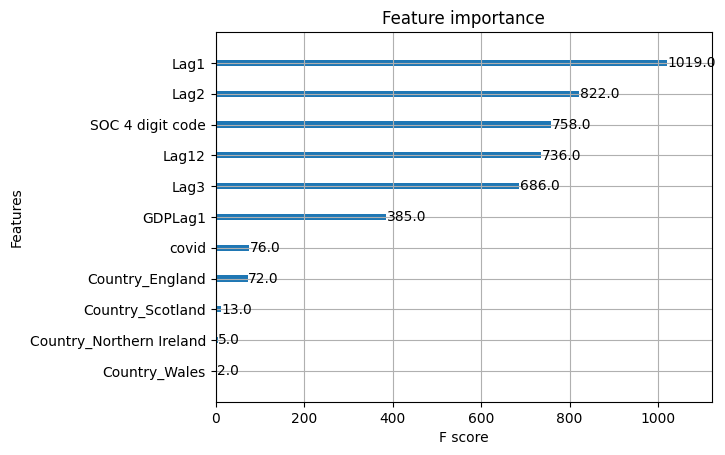

In [107]:
plot_importance(basemodel)
plt.show()

In [108]:
predicted_df = pd.DataFrame({'Value': predict_train, "Country": df_t19_ts_predict.Country.values,"SOC4": df_t19_ts_predict["SOC 4 digit code"].values, "Type": "Predicted"}, index=train_agg_X.index)
actual_df = pd.DataFrame({'Value': train_agg_y["Data"].values, "Country": df_t19_ts_predict.Country.values,"SOC4": df_t19_ts_predict["SOC 4 digit code"].values, "Type": "Actual"}, index=train_agg_X.index)
predicted_df.shape, actual_df.shape

((126896, 4), (126896, 4))

In [109]:
predicted_df['SOC2'] = predicted_df['SOC4'].astype(str).str[:2]
actual_df['SOC2'] = actual_df['SOC4'].astype(str).str[:2]

predicted_df.head()

Value  Country  SOC4       Type SOC2
Date                                             
2017-01-01  1805.0  England  1111  Predicted   11
2017-01-01  1805.0  England  1112  Predicted   11
2017-01-01  3107.0  England  1121  Predicted   11
2017-01-01  3107.0  England  1122  Predicted   11
2017-01-01  3107.0  England  1123  Predicted   11

In [110]:
group_df = pd.concat([actual_df, predicted_df], axis=0)
group_df

Value           Country  SOC4       Type SOC2
Date                                                      
2017-01-01   730.0           England  1111     Actual   11
2017-01-01   530.0           England  1112     Actual   11
2017-01-01  5435.0           England  1121     Actual   11
2017-01-01  4010.0           England  1122     Actual   11
2017-01-01   140.0           England  1123     Actual   11
...            ...               ...   ...        ...  ...
2023-05-01    77.0  Northern Ireland  9264  Predicted   92
2023-05-01    85.0  Northern Ireland  9265  Predicted   92
2023-05-01    36.0  Northern Ireland  9266  Predicted   92
2023-05-01    69.0  Northern Ireland  9267  Predicted   92
2023-05-01    23.0  Northern Ireland  9269  Predicted   92

[253792 rows x 5 columns]

In [111]:
group_df_2= group_df.groupby(["Date","SOC2","Country","Type"])["Value"].sum().reset_index()

In [112]:
fig = px.line(group_df_2[group_df_2["Country"] == "England"], x="Date", y='Value', line_dash='Type', color = "SOC2" ,title=f'Total NEW ADS by SOC2 - England')
fig.update_layout(height=800, width=1000)
fig.show()

It looks promising but!!! --> Time Series on Training Data. The idea was to check that is actually learning on the right curves. And it does!

## Prediction 2025

Because we use laggings, we will predict month by month, refresh the laggings and assume that the prediction is good.

In [113]:
test_agg_X2 = test_agg_X.copy() # Dataset with all the months to predict

In [114]:
test_agg_X.head()

SOC 4 digit code  Country_England  Country_Northern Ireland  \
Date                                                                      
2023-06-01              1111              1.0                       0.0   
2023-06-01              1112              1.0                       0.0   
2023-06-01              1121              1.0                       0.0   
2023-06-01              1122              1.0                       0.0   
2023-06-01              1123              1.0                       0.0   

            Country_Scotland  Country_Wales  covid    Lag1    Lag2    Lag3  \
Date                                                                         
2023-06-01               0.0            0.0      0   765.0   570.0   735.0   
2023-06-01               0.0            0.0      0   665.0   585.0   625.0   
2023-06-01               0.0            0.0      0  4355.0  3775.0  4500.0   
2023-06-01               0.0            0.0      0  3450.0  3025.0  3785.0   
2023-06-01               0.0            0.0      0   110.0   105.0   115.0   

             Lag12  GDPLag1  
Date                         
2023-06-01   905.0      0.2  
2023-06-01   910.0      0.2  
2023-06-01  5285.0      0.2  
2023-06-01  4080.0      0.2  
2023-06-01   135.0      0.2

In [115]:
rows_month = 412 * 4 # 412 SOC4 - 4 countries

In [116]:
total_months_predict= int(test_agg_X.shape[0]/(412*4))
total_months_predict

31

In [117]:
test_agg_X = prediction_data.drop(columns = ["Data","Training","Country"])
test_agg_X

SOC 4 digit code  Country_England  Country_Northern Ireland  \
Date                                                                      
2023-06-01              1111              1.0                       0.0   
2023-06-01              1112              1.0                       0.0   
2023-06-01              1121              1.0                       0.0   
2023-06-01              1122              1.0                       0.0   
2023-06-01              1123              1.0                       0.0   
...                      ...              ...                       ...   
2025-12-01              9264              0.0                       1.0   
2025-12-01              9265              0.0                       1.0   
2025-12-01              9266              0.0                       1.0   
2025-12-01              9267              0.0                       1.0   
2025-12-01              9269              0.0                       1.0   

            Country_Scotland  Country_Wales  covid    Lag1    Lag2    Lag3  \
Date                                                                         
2023-06-01               0.0            0.0      0   765.0   570.0   735.0   
2023-06-01               0.0            0.0      0   665.0   585.0   625.0   
2023-06-01               0.0            0.0      0  4355.0  3775.0  4500.0   
2023-06-01               0.0            0.0      0  3450.0  3025.0  3785.0   
2023-06-01               0.0            0.0      0   110.0   105.0   115.0   
...                      ...            ...    ...     ...     ...     ...   
2025-12-01               0.0            0.0      0     NaN     NaN     NaN   
2025-12-01               0.0            0.0      0     NaN     NaN     NaN   
2025-12-01               0.0            0.0      0     NaN     NaN     NaN   
2025-12-01               0.0            0.0      0     NaN     NaN     NaN   
2025-12-01               0.0            0.0      0     NaN     NaN     NaN   

             Lag12  GDPLag1  
Date                         
2023-06-01   905.0     0.20  
2023-06-01   910.0     0.20  
2023-06-01  5285.0     0.20  
2023-06-01  4080.0     0.20  
2023-06-01   135.0     0.20  
...            ...      ...  
2025-12-01     NaN     0.42  
2025-12-01     NaN     0.42  
2025-12-01     NaN     0.42  
2025-12-01     NaN     0.42  
2025-12-01     NaN     0.42  

[51088 rows x 11 columns]

In [118]:
test_agg_X["Prediction"] = -9999
test_agg_X.iloc[1648:]

SOC 4 digit code  Country_England  Country_Northern Ireland  \
Date                                                                      
2023-07-01              1111              1.0                       0.0   
2023-07-01              1112              1.0                       0.0   
2023-07-01              1121              1.0                       0.0   
2023-07-01              1122              1.0                       0.0   
2023-07-01              1123              1.0                       0.0   
...                      ...              ...                       ...   
2025-12-01              9264              0.0                       1.0   
2025-12-01              9265              0.0                       1.0   
2025-12-01              9266              0.0                       1.0   
2025-12-01              9267              0.0                       1.0   
2025-12-01              9269              0.0                       1.0   

            Country_Scotland  Country_Wales  covid  Lag1    Lag2    Lag3  \
Date                                                                       
2023-07-01               0.0            0.0      0   NaN   765.0   570.0   
2023-07-01               0.0            0.0      0   NaN   665.0   585.0   
2023-07-01               0.0            0.0      0   NaN  4355.0  3775.0   
2023-07-01               0.0            0.0      0   NaN  3450.0  3025.0   
2023-07-01               0.0            0.0      0   NaN   110.0   105.0   
...                      ...            ...    ...   ...     ...     ...   
2025-12-01               0.0            0.0      0   NaN     NaN     NaN   
2025-12-01               0.0            0.0      0   NaN     NaN     NaN   
2025-12-01               0.0            0.0      0   NaN     NaN     NaN   
2025-12-01               0.0            0.0      0   NaN     NaN     NaN   
2025-12-01               0.0            0.0      0   NaN     NaN     NaN   

             Lag12  GDPLag1  Prediction  
Date                                     
2023-07-01   905.0     0.00       -9999  
2023-07-01   940.0     0.00       -9999  
2023-07-01  5710.0     0.00       -9999  
2023-07-01  4240.0     0.00       -9999  
2023-07-01   130.0     0.00       -9999  
...            ...      ...         ...  
2025-12-01     NaN     0.42       -9999  
2025-12-01     NaN     0.42       -9999  
2025-12-01     NaN     0.42       -9999  
2025-12-01     NaN     0.42       -9999  
2025-12-01     NaN     0.42       -9999  

[49440 rows x 12 columns]

In [119]:
# Logic to run 1 by 1 the predictions and use the predicted values as laggings for Future!
for x in range(1, total_months_predict+1):

    df_tmp = test_agg_X.iloc[(x-1)*rows_month:x*rows_month]
    df_tmp.drop(columns = "Prediction", inplace = True)
    
    predict_val= np.round(basemodel.predict(df_tmp)).tolist()
    
    #Changing predictions on test_agg_X
    test_agg_X.loc[(x-1)*rows_month:x*rows_month, "Prediction"] = predict_val
    
    #Changing Lags with predictions on test_agg_X
    if x+11 < total_months_predict:
        test_agg_X.loc[x*rows_month:x*rows_month+rows_month, "Lag1"] = predict_val
        test_agg_X.loc[x*rows_month+rows_month:x*rows_month+rows_month * 2, "Lag2"] = predict_val
        test_agg_X.loc[x*rows_month+rows_month * 2:x*rows_month+rows_month * 3, "Lag3"] = predict_val
        test_agg_X.loc[x*rows_month+rows_month * 11:x*rows_month+rows_month * 12, "Lag12"] = predict_val
    
    elif x+2 < total_months_predict:
        test_agg_X.loc[x*rows_month:x*rows_month+rows_month, "Lag1"] = predict_val
        test_agg_X.loc[x*rows_month+rows_month:x*rows_month+rows_month * 2, "Lag2"] = predict_val
        test_agg_X.loc[x*rows_month+rows_month * 2:x*rows_month+rows_month * 3, "Lag3"] = predict_val
    
    elif x+1 < total_months_predict:
        test_agg_X.loc[x*rows_month:x*rows_month+rows_month, "Lag1"] = predict_val
        test_agg_X.loc[x*rows_month+rows_month:x*rows_month+rows_month * 2, "Lag2"] = predict_val
        
    elif x < total_months_predict:
        test_agg_X.loc[x*rows_month:x*rows_month+rows_month, "Lag1"] = predict_val
    
    

/tmp/ipykernel_139935/346886596.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_139935/346886596.py:10: FutureWarning:

Slicing a positional slice with .loc is not supported, and will raise TypeError in a future version.  Use .loc with labels or .iloc with positions instead.

/tmp/ipykernel_139935/346886596.py:14: FutureWarning:

Slicing a positional slice with .loc is not supported, and will raise TypeError in a future version.  Use .loc with labels or .iloc with positions instead.

/tmp/ipykernel_139935/346886596.py:15: FutureWarning:

Slicing a positional slice with .loc is not supported, and will raise TypeError in a future version.  Use .loc with labels or .iloc with positions instead.

/tmp/ipykernel_139935/346886596.py:16: FutureWarning:

Slicing a positional slice with .loc i

/tmp/ipykernel_139935/346886596.py:10: FutureWarning:

Slicing a positional slice with .loc is not supported, and will raise TypeError in a future version.  Use .loc with labels or .iloc with positions instead.

/tmp/ipykernel_139935/346886596.py:14: FutureWarning:

Slicing a positional slice with .loc is not supported, and will raise TypeError in a future version.  Use .loc with labels or .iloc with positions instead.

/tmp/ipykernel_139935/346886596.py:15: FutureWarning:

Slicing a positional slice with .loc is not supported, and will raise TypeError in a future version.  Use .loc with labels or .iloc with positions instead.

/tmp/ipykernel_139935/346886596.py:16: FutureWarning:

Slicing a positional slice with .loc is not supported, and will raise TypeError in a future version.  Use .loc with labels or .iloc with positions instead.

/tmp/ipykernel_139935/346886596.py:17: FutureWarning:

Slicing a positional slice with .loc is not supported, and will raise TypeError in a future versi

/tmp/ipykernel_139935/346886596.py:10: FutureWarning:

Slicing a positional slice with .loc is not supported, and will raise TypeError in a future version.  Use .loc with labels or .iloc with positions instead.

/tmp/ipykernel_139935/346886596.py:14: FutureWarning:

Slicing a positional slice with .loc is not supported, and will raise TypeError in a future version.  Use .loc with labels or .iloc with positions instead.

/tmp/ipykernel_139935/346886596.py:15: FutureWarning:

Slicing a positional slice with .loc is not supported, and will raise TypeError in a future version.  Use .loc with labels or .iloc with positions instead.

/tmp/ipykernel_139935/346886596.py:16: FutureWarning:

Slicing a positional slice with .loc is not supported, and will raise TypeError in a future version.  Use .loc with labels or .iloc with positions instead.

/tmp/ipykernel_139935/346886596.py:17: FutureWarning:

Slicing a positional slice with .loc is not supported, and will raise TypeError in a future versi

/tmp/ipykernel_139935/346886596.py:10: FutureWarning:

Slicing a positional slice with .loc is not supported, and will raise TypeError in a future version.  Use .loc with labels or .iloc with positions instead.

/tmp/ipykernel_139935/346886596.py:20: FutureWarning:

Slicing a positional slice with .loc is not supported, and will raise TypeError in a future version.  Use .loc with labels or .iloc with positions instead.

/tmp/ipykernel_139935/346886596.py:21: FutureWarning:

Slicing a positional slice with .loc is not supported, and will raise TypeError in a future version.  Use .loc with labels or .iloc with positions instead.

/tmp/ipykernel_139935/346886596.py:22: FutureWarning:

Slicing a positional slice with .loc is not supported, and will raise TypeError in a future version.  Use .loc with labels or .iloc with positions instead.

/tmp/ipykernel_139935/346886596.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in th

In [120]:
## Validating that is doing the Lagging properly:

In [121]:
# At the Beggining
prediction_06_23 = test_agg_X.loc["2023-06-01"]["Prediction"].values
Lag1_07_23 = test_agg_X.loc["2023-07-01"]["Lag1"].values
Lag2_08_23 = test_agg_X.loc["2023-08-01"]["Lag2"].values
Lag3_09_23 = test_agg_X.loc["2023-09-01"]["Lag3"].values
Lag12_06_24 = test_agg_X.loc["2024-06-01"]["Lag12"].values


are_equal = np.array_equal(prediction_06_23, Lag1_07_23)
are_equal2 = np.array_equal(prediction_06_23, Lag2_08_23)
are_equal3 = np.array_equal(prediction_06_23, Lag3_09_23)
are_equal12 = np.array_equal(prediction_06_23, Lag12_06_24)

assert (are_equal * are_equal2 * are_equal3 * are_equal12)

In [122]:
# In the middle

prediction_08_24 = test_agg_X.loc["2024-08-01"]["Prediction"].values
Lag1_09_24 = test_agg_X.loc["2024-09-01"]["Lag1"].values
Lag2_10_24 = test_agg_X.loc["2024-10-01"]["Lag2"].values
Lag3_11_24 = test_agg_X.loc["2024-11-01"]["Lag3"].values
Lag12_08_25 = test_agg_X.loc["2025-08-01"]["Lag12"].values


are_equal = np.array_equal(prediction_08_24, Lag1_09_24)
are_equal2 = np.array_equal(prediction_08_24, Lag2_10_24)
are_equal3 = np.array_equal(prediction_08_24, Lag3_11_24)
are_equal12 = np.array_equal(prediction_08_24, Lag12_08_25)

assert (are_equal * are_equal2 * are_equal3 * are_equal12)

In [123]:
# At the end:

prediction_11_25 = test_agg_X.loc["2025-11-01"]["Prediction"].values
prediction_10_25 = test_agg_X.loc["2025-10-01"]["Prediction"].values
prediction_09_25 = test_agg_X.loc["2025-09-01"]["Prediction"].values
prediction_12_24 = test_agg_X.loc["2024-12-01"]["Prediction"].values
Lag12_12_25 = test_agg_X.loc["2025-12-01"]["Lag12"].values
Lag3_11_25 = test_agg_X.loc["2025-12-01"]["Lag3"].values
Lag2_12_25 = test_agg_X.loc["2025-12-01"]["Lag2"].values
Lag1_12_25 = test_agg_X.loc["2025-12-01"]["Lag1"].values

are_equal = np.array_equal(prediction_11_25, Lag1_12_25)
are_equal2 = np.array_equal(prediction_10_25, Lag2_12_25)
are_equal3 = np.array_equal(prediction_09_25, Lag3_11_25)
are_equal12 = np.array_equal(prediction_12_24, Lag12_12_25)

assert are_equal * are_equal2 * are_equal3 *  are_equal12

In [124]:
test_agg_X.loc["2025-12-01"]

SOC 4 digit code  Country_England  Country_Northern Ireland  \
Date                                                                      
2025-12-01              1111              1.0                       0.0   
2025-12-01              1112              1.0                       0.0   
2025-12-01              1121              1.0                       0.0   
2025-12-01              1122              1.0                       0.0   
2025-12-01              1123              1.0                       0.0   
...                      ...              ...                       ...   
2025-12-01              9264              0.0                       1.0   
2025-12-01              9265              0.0                       1.0   
2025-12-01              9266              0.0                       1.0   
2025-12-01              9267              0.0                       1.0   
2025-12-01              9269              0.0                       1.0   

            Country_Scotland  Country_Wales  covid    Lag1    Lag2    Lag3  \
Date                                                                         
2025-12-01               0.0            0.0      0   652.0   652.0   681.0   
2025-12-01               0.0            0.0      0   652.0   681.0   678.0   
2025-12-01               0.0            0.0      0  4737.0  4844.0  4748.0   
2025-12-01               0.0            0.0      0  3091.0  3115.0  3028.0   
2025-12-01               0.0            0.0      0   126.0   123.0   129.0   
...                      ...            ...    ...     ...     ...     ...   
2025-12-01               0.0            0.0      0   105.0   105.0   105.0   
2025-12-01               0.0            0.0      0    79.0    79.0    82.0   
2025-12-01               0.0            0.0      0    43.0    43.0    43.0   
2025-12-01               0.0            0.0      0    79.0    79.0    79.0   
2025-12-01               0.0            0.0      0    43.0    43.0    43.0   

             Lag12  GDPLag1  Prediction  
Date                                     
2025-12-01   695.0     0.42       649.0  
2025-12-01   729.0     0.42       652.0  
2025-12-01  4887.0     0.42      4720.0  
2025-12-01  3042.0     0.42      3028.0  
2025-12-01   115.0     0.42       123.0  
...            ...      ...         ...  
2025-12-01   100.0     0.42       105.0  
2025-12-01    77.0     0.42        79.0  
2025-12-01    41.0     0.42        43.0  
2025-12-01    77.0     0.42        79.0  
2025-12-01    39.0     0.42        43.0  

[1648 rows x 12 columns]

## Plotting Results

In [125]:
predicted_df_2 = pd.DataFrame({'Value': test_agg_X.Prediction, "Country": prediction_data.Country.values,"SOC4": prediction_data["SOC 4 digit code"].values, "Type": "Predicted"}, index=test_agg_X.index)
predicted_df_2

Value           Country  SOC4       Type
Date                                                 
2023-06-01   778.0           England  1111  Predicted
2023-06-01   691.0           England  1112  Predicted
2023-06-01  4071.0           England  1121  Predicted
2023-06-01  3440.0           England  1122  Predicted
2023-06-01   102.0           England  1123  Predicted
...            ...               ...   ...        ...
2025-12-01   105.0  Northern Ireland  9264  Predicted
2025-12-01    79.0  Northern Ireland  9265  Predicted
2025-12-01    43.0  Northern Ireland  9266  Predicted
2025-12-01    79.0  Northern Ireland  9267  Predicted
2025-12-01    43.0  Northern Ireland  9269  Predicted

[51088 rows x 4 columns]

In [126]:
predicted_df_2['SOC2'] = predicted_df_2['SOC4'].astype(str).str[:2]

### Results by SOC 2:

In [127]:
group_df_2_pdf_2= predicted_df_2.groupby(["Date","SOC2","Country","Type"])["Value"].sum().reset_index()

In [128]:
fig = px.line(group_df_2_pdf_2[group_df_2_pdf_2["Country"] == "England"], x="Date", y='Value', line_dash='Type', color = "SOC2" ,title=f'Total NEW ADS by SOC2 - England')
fig.update_layout(height=800, width=1600)
fig.show()

### Plot: Training + Prediction

In [129]:
# Joining results from training with the predictions:

plot_TPred = group_df_2.append(group_df_2_pdf_2)
plot_TPred

/tmp/ipykernel_139935/2181408557.py:3: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



Date SOC2           Country       Type    Value
0    2017-01-01   11           England     Actual  42475.0
1    2017-01-01   11           England  Predicted  42359.0
2    2017-01-01   11  Northern Ireland     Actual    505.0
3    2017-01-01   11  Northern Ireland  Predicted   1530.0
4    2017-01-01   11          Scotland     Actual   1720.0
...         ...  ...               ...        ...      ...
3219 2025-12-01   91             Wales  Predicted    494.0
3220 2025-12-01   92           England  Predicted  70510.0
3221 2025-12-01   92  Northern Ireland  Predicted   1618.0
3222 2025-12-01   92          Scotland  Predicted   5484.0
3223 2025-12-01   92             Wales  Predicted   3377.0

[19240 rows x 5 columns]

In [130]:
fig = px.line(plot_TPred[plot_TPred["Country"] == "England"], x="Date", y='Value', line_dash='Type', color = "SOC2" ,title=f'Total ADS by SOC2 - England')
fig.update_layout(height=800, width=1600)
fig.show()

### Results by SOC 4:

In [131]:
soc4 = 2134

In [132]:
plt_4soc = predicted_df_2[(predicted_df_2['SOC4'] == soc4)]
plt_4soc.head()

Value           Country  SOC4       Type SOC2
Date                                                       
2023-06-01  15836.0           England  2134  Predicted   21
2023-06-01   1114.0          Scotland  2134  Predicted   21
2023-06-01    436.0             Wales  2134  Predicted   21
2023-06-01    468.0  Northern Ireland  2134  Predicted   21
2023-07-01  16702.0           England  2134  Predicted   21

In [133]:
fig = px.line(plt_4soc.groupby(["Date","Type"])["Value"].sum().reset_index(), x="Date", y='Value', line_dash='Type', title=f'Total NEW ADS {soc4} UK')
fig.update_layout(height=800, width=1600)
fig.show()

In [134]:
fig = px.line(plt_4soc, x=plt_4soc.index, y='Value', line_dash='Type', color = "Country", title=f'Total NEW ADS {soc4} by Country')
fig.update_layout(height=600, width=1600)
fig.show()

# Inspecting Results:

In [135]:
def assign_values(index_date):
    reference_dates = ['2023-06-01', '2023-07-01', '2023-08-01', '2023-09-01', '2023-10-01', '2023-11-01', '2023-12-01', 
                       '2024-01-01','2024-02-01', '2024-03-01', '2024-04-01', '2024-05-01', '2024-06-01', '2024-07-01', '2024-08-01','2024-09-01', '2024-10-01', '2024-11-01', '2024-12-01',
                       '2025-01-01','2025-02-01', '2025-03-01', '2025-04-01', '2025-05-01', '2025-06-01', '2025-07-01', '2025-08-01','2025-09-01', '2025-10-01', '2025-11-01', '2025-12-01']
    values = [1, 2, 3, 4, 5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31]

    for ref_date, value in zip(reference_dates, values):
        if index_date == pd.to_datetime(ref_date):
            return value
    return None

In [136]:
# Creating Month_predicted to have more interpretable results:
df = predicted_df_2.copy()
df['Month_Predicted'] = df.index.map(assign_values)
df

Value           Country  SOC4       Type SOC2  Month_Predicted
Date                                                                       
2023-06-01   778.0           England  1111  Predicted   11                1
2023-06-01   691.0           England  1112  Predicted   11                1
2023-06-01  4071.0           England  1121  Predicted   11                1
2023-06-01  3440.0           England  1122  Predicted   11                1
2023-06-01   102.0           England  1123  Predicted   11                1
...            ...               ...   ...        ...  ...              ...
2025-12-01   105.0  Northern Ireland  9264  Predicted   92               31
2025-12-01    79.0  Northern Ireland  9265  Predicted   92               31
2025-12-01    43.0  Northern Ireland  9266  Predicted   92               31
2025-12-01    79.0  Northern Ireland  9267  Predicted   92               31
2025-12-01    43.0  Northern Ireland  9269  Predicted   92               31

[51088 rows x 6 columns]

<b> Running Linear Models on each SOC4 prediction (06/2023 to 12/2025) to find the TREND (Coefficient) for the predicted time

In [137]:
from sklearn.linear_model import LinearRegression


# Create an empty DataFrame to store the regression results
regression_results = pd.DataFrame(columns=['SOC4', 'Intercept', 'Coefficient'])

# Group the data by SOC4 and do linear regression for each group
for soc4, group_df in df.groupby('SOC4'):
    X = group_df["Month_Predicted"].values.reshape(-1, 1)  
    y = group_df['Value'].values

    # Fit linear regression model
    model = LinearRegression()
    model.fit(X, y)
    
    # Store the results in the regression_results DataFrame
    regression_results = regression_results.append({
        'SOC4': soc4,
        'Intercept': model.intercept_,
        'Coefficient': model.coef_[0]
    }, ignore_index=True)

print(regression_results)

/tmp/ipykernel_139935/3130086373.py:17: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/tmp/ipykernel_139935/3130086373.py:17: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/tmp/ipykernel_139935/3130086373.py:17: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/tmp/ipykernel_139935/3130086373.py:17: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/tmp/ipykernel_139935/3130086373.py:17: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/tmp/ipykernel_139935/3130086373.py:17: FutureWarning:

The frame.append method is deprecated and will be removed from pandas

/tmp/ipykernel_139935/3130086373.py:17: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/tmp/ipykernel_139935/3130086373.py:17: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/tmp/ipykernel_139935/3130086373.py:17: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/tmp/ipykernel_139935/3130086373.py:17: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/tmp/ipykernel_139935/3130086373.py:17: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/tmp/ipykernel_139935/3130086373.py:17: FutureWarning:

The frame.append method is deprecated and will be removed from pandas

/tmp/ipykernel_139935/3130086373.py:17: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/tmp/ipykernel_139935/3130086373.py:17: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/tmp/ipykernel_139935/3130086373.py:17: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/tmp/ipykernel_139935/3130086373.py:17: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/tmp/ipykernel_139935/3130086373.py:17: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/tmp/ipykernel_139935/3130086373.py:17: FutureWarning:

The frame.append method is deprecated and will be removed from pandas

/tmp/ipykernel_139935/3130086373.py:17: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/tmp/ipykernel_139935/3130086373.py:17: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/tmp/ipykernel_139935/3130086373.py:17: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/tmp/ipykernel_139935/3130086373.py:17: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/tmp/ipykernel_139935/3130086373.py:17: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/tmp/ipykernel_139935/3130086373.py:17: FutureWarning:

The frame.append method is deprecated and will be removed from pandas

/tmp/ipykernel_139935/3130086373.py:17: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/tmp/ipykernel_139935/3130086373.py:17: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/tmp/ipykernel_139935/3130086373.py:17: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/tmp/ipykernel_139935/3130086373.py:17: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/tmp/ipykernel_139935/3130086373.py:17: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/tmp/ipykernel_139935/3130086373.py:17: FutureWarning:

The frame.append method is deprecated and will be removed from pandas

       SOC4    Intercept  Coefficient
0    1111.0   228.543548    -2.115121
1    1112.0   229.645161    -2.144153
2    1121.0  1406.059677    -3.032460
3    1122.0  1051.364516    -7.859476
4    1123.0    35.743548    -0.118044
..      ...          ...          ...
407  9264.0  1456.862903     2.526714
408  9265.0  1302.624194     3.255847
409  9266.0   511.158065    -4.063306
410  9267.0   685.251613     1.728226
411  9269.0   258.019355     0.623790

[412 rows x 3 columns]


/tmp/ipykernel_139935/3130086373.py:17: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/tmp/ipykernel_139935/3130086373.py:17: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/tmp/ipykernel_139935/3130086373.py:17: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/tmp/ipykernel_139935/3130086373.py:17: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/tmp/ipykernel_139935/3130086373.py:17: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/tmp/ipykernel_139935/3130086373.py:17: FutureWarning:

The frame.append method is deprecated and will be removed from pandas

In [138]:
sorted_results = regression_results.sort_values(by='Coefficient', ascending=False)
sorted_results.head(5)

SOC4    Intercept  Coefficient
59   2134.0  5128.495161    49.436290
293  6113.0  1938.338710     7.454133
96   2313.0  2101.016129     6.672379
292  6112.0  2502.840323     6.125907
57   2132.0  2303.467742     5.576613

In [139]:
# Getting names from Full Dataset
names = df_t19[["SOC 4 digit code", "SOC 4 digit label"]].iloc[:412,]

In [140]:
# TOP 50 Positions by Trend from 2023-May to 2025-Dec
sort_SOC4 = sorted_results.merge(right = names, how="left", left_on = "SOC4", right_on="SOC 4 digit code")[["SOC4", "Intercept", "Coefficient", "SOC 4 digit label"]]
sort_SOC4.head(50)

SOC4    Intercept  Coefficient  \
0   2134.0  5128.495161    49.436290   
1   6113.0  1938.338710     7.454133   
2   2313.0  2101.016129     6.672379   
3   6112.0  2502.840323     6.125907   
4   2132.0  2303.467742     5.576613   
5   3574.0  2476.741935     4.133569   
6   9231.0  1643.527419     3.978629   
7   9265.0  1302.624194     3.255847   
8   2440.0  2790.166129     3.031452   
9   5434.0  2801.141935     2.914012   
10  3213.0   618.487097     2.531552   
11  9264.0  1456.862903     2.526714   
12  2412.0  1956.946774     2.243246   
13  2453.0  1225.498387     2.176512   
14  9223.0  2966.730645     2.106552   
15  2240.0   663.312903     1.950202   
16  2319.0   654.217742     1.937500   
17  9267.0   685.251613     1.728226   
18  4216.0  2229.724194     1.713306   
19  2131.0   614.217742     1.526714   
20  3414.0   628.403226     1.330645   
21  3412.0   585.700000     1.280343   
22  2212.0  1694.124194     1.180242   
23  2152.0   691.293548     1.101613   
24  9233.0   120.182258     1.100504   
25  3557.0   713.261290     1.081956   
26  2255.0    94.180645     1.048185   
27  3229.0  1457.874194     1.037097   
28  2423.0   675.961290     1.017540   
29  3432.0   465.832258     1.017036   
30  3417.0   446.593548     0.958367   
31  3120.0   637.158065     0.941734   
32  6136.0  1328.335484     0.915020   
33  5241.0  1482.174194     0.894859   
34  4142.0  1273.683871     0.894758   
35  2315.0   499.611290     0.843347   
36  6131.0  2915.325806     0.836492   
37  2129.0  1431.525806     0.799294   
38  2321.0   324.567742     0.781048   
39  6133.0   499.475806     0.767641   
40  3311.0    96.491935     0.732863   
41  5413.0   106.864516     0.644052   
42  9269.0   258.019355     0.623790   
43  4143.0   701.940323     0.622177   
44  5250.0   639.214516     0.608065   
45  3231.0   482.104839     0.606855   
46  1134.0   689.058065     0.590121   
47  2439.0   234.438710     0.589012   
48  8144.0   127.798387     0.583165   
49  8143.0   706.380645     0.582056   

                                    SOC 4 digit label  
0   Programmers and software development professio...  
1                      Educational support assistants  
2          Secondary education teaching professionals  
3                                 Teaching assistants  
4                                         IT managers  
5            Other vocational and industrial trainers  
6             Security guards and related occupations  
7                                           Bar staff  
8   Business and financial project management prof...  
9                                               Chefs  
10                     Medical and dental technicians  
11                             Waiters and waitresses  
12                             Solicitors and lawyers  
13                                 Quantity surveyors  
14                             Cleaners and domestics  
15                                      Veterinarians  
16                      Teaching professionals n.e.c.  
17                  Leisure and theme park attendants  
18                                      Receptionists  
19                                IT project managers  
20                         Dancers and choreographers  
21                   Authors, writers and translators  
22                   Specialist medical practitioners  
23                          Environment professionals  
24                                  Exam invigilators  
25                     Events managers and organisers  
26                                         Paramedics  
27  Welfare and housing associate professionals n....  
28                                   Taxation experts  
29          Sports coaches, instructors and officials  
30  Photographers, audio-visual and broadcasting e...  
31         CAD, drawing and architectural technicians  
32                                Senior care workers  
33                Electricians and electrical fitters  
34   

In [141]:
sort_SOC4['SOC2'] = sort_SOC4['SOC4'].astype(str).str[:2]
sort_SOC4

SOC4    Intercept  Coefficient  \
0    2134.0  5128.495161    49.436290   
1    6113.0  1938.338710     7.454133   
2    2313.0  2101.016129     6.672379   
3    6112.0  2502.840323     6.125907   
4    2132.0  2303.467742     5.576613   
..      ...          ...          ...   
407  3552.0  3468.048387   -17.712198   
408  7219.0  3882.537097   -21.109173   
409  3132.0  3997.369355   -24.469153   
410  4159.0  4144.672581   -25.452823   
411  3556.0  4641.300000   -39.997077   

                                     SOC 4 digit label SOC2  
0    Programmers and software development professio...   21  
1                       Educational support assistants   61  
2           Secondary education teaching professionals   23  
3                                  Teaching assistants   61  
4                                          IT managers   21  
..                                                 ...  ...  
407                          Business sales executives   35  
408                Customer service occupations n.e.c.   72  
409                        IT user support technicians   31  
410            Other administrative occupations n.e.c.   41  
411   Sales accounts and business development managers   35  

[412 rows x 5 columns]

In [142]:
#Adding the Value (Predicted Amount of new jobs per SOC4 in 2025 )
sort_SOC4 = sort_SOC4.merge(df[df.index >= "2025-01-01"].groupby("SOC4").sum()[["Value"]].reset_index(), left_on= "SOC4", right_on="SOC4", how ="left")
sort_SOC4.head(5)

SOC4    Intercept  Coefficient  \
0  2134.0  5128.495161    49.436290   
1  6113.0  1938.338710     7.454133   
2  2313.0  2101.016129     6.672379   
3  6112.0  2502.840323     6.125907   
4  2132.0  2303.467742     5.576613   

                                   SOC 4 digit label SOC2     Value  
0  Programmers and software development professio...   21  303615.0  
1                     Educational support assistants   61  103439.0  
2         Secondary education teaching professionals   23  110923.0  
3                                Teaching assistants   61  128702.0  
4                                        IT managers   21  117384.0

## Creating Index - Importance of SOC4 : Weighting Coefficients 

<b> SOC4 Importance: (Coefficients SOC4 * Total amount of NEW jobs SOC4 expected on 2025) / Total amount of NEW JOBS 2025

In [143]:
sort_SOC4["WeightedRoles"]=  (sort_SOC4["Value"]*(sort_SOC4["Coefficient"]))/sort_SOC4["Value"].sum()
sort_SOC4.sort_values(by='WeightedRoles', ascending=False).head(30).reset_index()

index    SOC4    Intercept  Coefficient  \
0       0  2134.0  5128.495161    49.436290   
1       3  6112.0  2502.840323     6.125907   
2       1  6113.0  1938.338710     7.454133   
3       2  2313.0  2101.016129     6.672379   
4       4  2132.0  2303.467742     5.576613   
5       5  3574.0  2476.741935     4.133569   
6       8  2440.0  2790.166129     3.031452   
7       9  5434.0  2801.141935     2.914012   
8       6  9231.0  1643.527419     3.978629   
9      14  9223.0  2966.730645     2.106552   
10     12  2412.0  1956.946774     2.243246   
11      7  9265.0  1302.624194     3.255847   
12     18  4216.0  2229.724194     1.713306   
13     11  9264.0  1456.862903     2.526714   
14     13  2453.0  1225.498387     2.176512   
15     36  6131.0  2915.325806     0.836492   
16     22  2212.0  1694.124194     1.180242   
17     10  3213.0   618.487097     2.531552   
18     27  3229.0  1457.874194     1.037097   
19     15  2240.0   663.312903     1.950202   
20     16  2319.0   654.217742     1.937500   
21     33  5241.0  1482.174194     0.894859   
22     17  9267.0   685.251613     1.728226   
23     32  6136.0  1328.335484     0.915020   
24     37  2129.0  1431.525806     0.799294   
25     34  4142.0  1273.683871     0.894758   
26     59  8214.0  2644.454839     0.404032   
27     19  2131.0   614.217742     1.526714   
28     20  3414.0   628.403226     1.330645   
29     25  3557.0   713.261290     1.081956   

                                    SOC 4 digit label SOC2     Value  \
0   Programmers and software development professio...   21  303615.0   
1                                 Teaching assistants   61  128702.0   
2                      Educational support assistants   61  103439.0   
3          Secondary education teaching professionals   23  110923.0   
4                                         IT managers   21  117384.0   
5            Other vocational and industrial trainers   35  124383.0   
6   Business and financial project management prof...   24  140592.0   
7                                               Chefs   54  140323.0   
8             Security guards and related occupations   92   84873.0   
9                              Cleaners and domestics   92  146067.0   
10                             Solicitors and lawyers   24   97008.0   
11                                          Bar staff   92   66789.0   
12                                      Receptionists   42  110056.0   
13                             Waiters and waitresses   92   72677.0   
14                                 Quantity surveyors   24   61569.0   
15                 Nursing auxiliaries and assistants   61  142942.0   
16                   Specialist medical practitioners   22   81864.0   
17                     Medical and dental technicians   32   32918.0   
18  Welfare and housing associate professionals n....   32   72111.0   
19                                      Veterinarians   22   34369.0   
20                      Teaching professionals n.e.c.   23   33872.0   
21                Electricians and electrical fitters   52   72226.0   
22                  Leisure and theme park attendants   92   35033.0   
23                                Senior care workers   61   65514.0   
24                   Engineering professionals n.e.c.   21   70251.0   
25                                 Office supervisors   41   62749.0   
26                      Delivery drivers and couriers   82  127315.0   
27                                IT project managers   21   31678.0   
28                         Dancers and choreographers   34   31930.0   
29                     Events managers and organisers   35   35825.0   

    WeightedRoles  
0        1.252369  
1        0.065784  
2        0.064335  
3        0.061754  
4        0.054619  
5        0.042899  
6        0.035561  
7        0.034118  
8        0.028175  
9        0.025674  
10       0.018157  
11       0.018144  
12       0.015733  
13       0.015322  
14       0.01

In [144]:
# Saving results for SOC4:
sort_SOC4.sort_values(by='SOC2', ascending=True).to_csv('Data/soc4_results2025.csv', index=False)

🎉🎉🎉🎉  <b> Important SOC4 for partner: <br>  </b>
    
- Programmers and software development professionals - SOC2134 (Wei.Roles Index: 1.252369)
- IT Managers - SOC2132 (Wei.Roles Index: 0.054619)
- Business and financial project management professionals - SOC2440  (Wei.Roles Index: 0.035561)
- IT project managers - SOC2131  (Wei.Roles Index: 0.004035)